# Team Members
- 22127148 - Dương Nhật Huy
- 22127224 - Trương Thuận Kiệt
- 22127257 - Phạm Minh Mẫn

# Table of contents
1. [Libraries](#libraries)
2. [Data Collection](#collect)
3. [Overview of dataset](#overview-of-dataset)
4. [Preprocessing data](#preprocessing)
5. [Questions](#questions)
    - [Question 1](#question-1)
    - [Question 2](#question-2)
    - [Question 3](#question-3)
    - [Question 4](#question-4)
6. [Conclusion](#conclusion)
    - [Difficulties during the project](#difficulties)
    - [Useful things learned](#useful)
    - [Plans to improve if have more time](#plans)
7. [References](#references)


<div id = "libraries">
<h2>1. Libraries</h2>
<p>Import necessary libraries to use</p> 
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tabulate import tabulate

In [2]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<div id="collect"> <h2>2. Data Collection</h2> </div>


- **Subject of data:**
The data pertains to stroke prediction in patients, containing information about various health parameters such as age, gender, hypertension, heart disease, smoking status, and more. Its primary purpose is to help predict the likelihood of stroke in individuals based on these features

- **Source of data:**
    - The source of the data is **`Kaggle`**:
[Data Stroke Prediction](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/data)
    - This dataset is uploaded by **Fede Soriano**, who is listed as the contributor on **`Kaggle`**.

- **Permission and Licensing:**
    - (Confidential Source) - Use only for educational purposes If you use this dataset in your research, please credit the author.

- **Data Collection:**

    - The dataset documentation does not provide explicit details about data collection methods on the **`Kaggle`** page, but generally, healthcare datasets like this are either:

        - Collected from healthcare systems or clinical records.
        - Synthetic data generated based on statistical distributions to mimic real-world health conditions.

<div id="overview-of-dataset"> <h2>3. Overview of dataset</h2> </div>
Provide an overview of the dataset.

In [3]:
data = pd.read_csv('./Data/healthcare-dataset-stroke-data.csv')

In [4]:
data.head() 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<h3> Number of rows and cols </h3>

In [5]:
print("Number of rows: ", len(data))

Number of rows:  5110


In [6]:
print("Number of columns: ", len(data.columns))

Number of columns:  12


<h3> Meaning of each row </h3>

Each row will represent each patient's medical record of stroke with some features relating to that patient.

After looking into the entire data of file csv, it can be seen there are no abnormal rows.

<h3> Duplicated rows </h3>

In [7]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


So can be seen that there is no duplicates

<h3> Meaning of each column </h3>

In [8]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Here is the description of each column:
    - **id**: id of each patient
    - **gender**: each patient's gender can be male, female and other
    - **age**: how old is each patient
    - **hypertension**: when the pressure in blood is too high
    - **heart_disease**:  when the patient have disease relates to heart
    - **ever_married**: whether the patient is or used to be married
    - **work_type**: the job status of the patient
    - **Residence_type**: the area that patients live
    - **avg_glucose_level**: the level of sugar in the blood
    - **bmi**: measure of body fat based on height and weight
    - **smoking_status**: whether the patient is smoking or not
    - **stroke**: whether the patient got stroke or not

- Unique values and value range of each column

In [9]:
# Unique values in each column
print("Unique values of gender: ", data['gender'].unique())
print("Unique values of hypertension: ", data['hypertension'].unique())
print("Unique values of heart_disease: ", data['heart_disease'].unique())
print("Unique values of ever_married: ", data['ever_married'].unique())
print("Unique values of work_type: ", data['work_type'].unique())
print("Unique values of Residence_type: ", data['Residence_type'].unique())
print("Unique values of smoking_status: ", data['smoking_status'].unique())
print("Unique values of stroke: ", data['stroke'].unique())

Unique values of gender:  ['Male' 'Female' 'Other']
Unique values of hypertension:  [0 1]
Unique values of heart_disease:  [1 0]
Unique values of ever_married:  ['Yes' 'No']
Unique values of work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values of Residence_type:  ['Urban' 'Rural']
Unique values of smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Unique values of stroke:  [1 0]


- So we can see unique values of each column:
    - **gender**: Male, Female, Other
    - **heart_disease**: 0: No, 1: Yes
    - **ever_married**: Yes, No
    - **work_type**: Private, Self-employed, Govt_job, children, Never_worked
    - **Residence_type**: Urban, Rural
    - **smoking_status**: formerly smoked, never smoked, smokes, Unknown
    - **stroke**: 1: Yes, 0: No

In [10]:
# Range values of age, avg_glucose_level, bmi
print("Range of age: ", data['age'].min(), " - ", data['age'].max())
print("Range of avg_glucose_level: ", data['avg_glucose_level'].min(), " - ", data['avg_glucose_level'].max())
print("Range of bmi: ", data['bmi'].min(), " - ", data['bmi'].max())

Range of age:  0.08  -  82.0
Range of avg_glucose_level:  55.12  -  271.74
Range of bmi:  10.3  -  97.6


- Range values:
    - **age**: 0.08-82.0
    - **avg_glucose_level**: 55.12 - 271.74
    - **bmi**: 10.3 - 97.6

=> As we see, age value got float values and needs to be corrected to integer in Data Processing

<h3>Current data type of each column</h3>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- Look like all data type of each column is correct, except from age type is currently float

<h3>Checking null values</h3>

In [12]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- Luckily as can be seen, only bmi column has null values

### NUMERICAL COLUMNS EXPLORATION

###   Missing data

- As can be from the above information, only bmi has the null values, so let have a look at it

In [13]:
#List out elements in bmi column
numerical = ['bmi']
data[numerical]

,bmi
0,36.6
1,NaN
2,32.5
3,34.4
4,24.0
...,...
5105,NaN
5106,40.0
5107,30.6
5108,25.6


- In order to identify kind of missingness, we will use **t-test**, for these reasons:
    - The variable is numerical: It is suitable for continuous or ordinal data where you’re comparing averages.
    - Two independent groups: Rows with and without missing bmi values are distinct groups.
    - Small sample sizes: The t-test is particularly useful for small-to-moderate-sized datasets, assuming data normality or robustness

In [14]:

null = data[data['bmi'].isnull()]
non_null = data[data['bmi'].notnull()]

from scipy.stats import ttest_ind

for col in data.columns:
    if (data[col].dtype == 'float64' or data[col].dtype == 'int64') and (col != 'bmi' and col != 'id'):
        t_stat, p_value = ttest_ind(null[col].dropna(), non_null[col].dropna(), equal_var=False)
        print("\nT-test results for", col, "between groups:")
        print("t-statistic:", t_stat)
        print("p-value:", p_value)


for col in data.columns:
    if data[col].dtype == 'object' and col != 'bmi':
        print("\nMissing 'bmi' by", col, ":")
        print(data.groupby(col)['bmi'].apply(lambda x: x.isnull().sum()))



T-test results for age between groups:
t-statistic: 5.725978410349808
p-value: 3.397736416677071e-08

T-test results for hypertension between groups:
t-statistic: 4.698744140096242
p-value: 4.759849351086857e-06

T-test results for heart_disease between groups:
t-statistic: 4.347777190024152
p-value: 2.1625306918478056e-05

T-test results for avg_glucose_level between groups:
t-statistic: 5.068112430827461
p-value: 8.816698412059382e-07

T-test results for stroke between groups:
t-statistic: 5.512357794686704
p-value: 1.0614185880641118e-07

Missing 'bmi' by gender :
gender
Female     97
Male      104
Other       0
Name: bmi, dtype: int64

Missing 'bmi' by ever_married :
ever_married
No      52
Yes    149
Name: bmi, dtype: int64

Missing 'bmi' by work_type :
work_type
Govt_job          27
Never_worked       0
Private          114
Self-employed     44
children          16
Name: bmi, dtype: int64

Missing 'bmi' by Residence_type :
Residence_type
Rural     95
Urban    106
Name: bmi, dtyp

- In terms of numerical columns, since there are statistically significant differences in these features, this strongly suggests that the missingness of bmi is **Missing at Random (MAR)** rather than Missing Completely at Random (MCAR). This means that missing bmi values are likely associated with other variables, such as age, hypertension, heart disease, glucose levels, and stroke occurrence
- In terms of categorical columns, the missingness of bmi appears to follow a **MAR (Missing at Random)** pattern for certain categorical variables

#### Percentage of missing value

In [15]:
#What is the percentage of missing value
for col in numerical:
    missing_rate = (data[col].isna().sum() / len(data[col]))*100
    print( f'{col}: {missing_rate}%')

bmi: 3.9334637964774952%


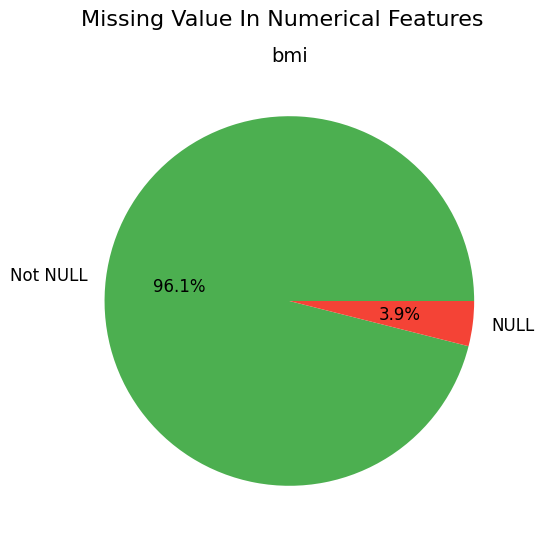

In [16]:
fig, ax = plt.subplots(1, len(numerical), figsize=(15, 5)) if len(numerical) > 1 else (plt.subplots(1, 1, figsize=(6, 6)))
ax = [ax] if len(numerical) == 1 else ax 

for i in range(len(numerical)):
    ax_i = ax[i]
    missing_count = data[numerical[i]].isnull().value_counts().reindex([False, True], fill_value=0)
    
    wedges, texts, autotexts = ax_i.pie(
        missing_count, 
        labels=['Not NULL', 'NULL'], 
        autopct='%1.1f%%', 
        colors=['#4CAF50', '#F44336']
    )

    for text in texts:
        text.set_fontsize(12)
    for autotext in autotexts:
        autotext.set_fontsize(12)

    ax_i.set_title(numerical[i], fontsize=14)

plt.suptitle("Missing Value In Numerical Features", fontsize=16)
plt.subplots_adjust(wspace=0.5)
plt.show()

- Fortunately, the percentage of null values in the bmi column is not very high, which means that handling these missing values should not drastically impact the dataset's integrity or size

<h4> Helper Function </h4>

Help to visualize the numerical columns

In [17]:
def histogram_plot(data = [], title = '', xlabel = '', ylabel = '', color = '', mean_line = False, median_line = False, bins = 30):
    plt.figure(figsize=(8,8))
    sns.histplot(data, bins=bins, color=color)
    plt.xticks(bins)

    if mean_line:
        mean_val = data.mean()
        plt.axvline(mean_val, color='blue', linestyle='-', linewidth=1.5, label=f"Mean: {mean_val:.1f}")
    if median_line:
        median_val = data.median()
        plt.axvline(median_val, color='red', linestyle='-', linewidth=1.5, label=f"Median: {median_val:.1f}")

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight = 'bold')
    plt.legend()
    plt.show()

def density_plot(data: pd.DataFrame, col1: str = '', col2: str = '', label1: str = '', label2: str = '', title: str = '', xlabel: str = '', ylabel: str = '', bins: int = 30):
    
    plt.figure(figsize=(8, 8))
    
    plt.hist(data[data[col2] == 1][col1], color='red', bins=bins, label=label1, alpha=0.7, density=True)
    
    plt.hist(data[data[col2] == 0][col1], color='blue', bins=bins, label=label2, alpha=0.7, density=True)
    
    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel, fontweight='bold')
    plt.ylabel(ylabel, fontweight='bold')
    plt.legend()
    plt.show()

<h4> Age Column </h4>

+ Descriptive Statistic

In [18]:
age_mean = data['age'].mean()
age_median = data['age'].median()
age_min = data['age'].min()
age_max = data['age'].max()
age_std = data['age'].std()

print(f"Mean age: {age_mean}")
print(f"Median age: {age_median}")
print(f"Min age: {age_min}")
print(f"Max age: {age_max}")
print(f"Standard deviation of age: {age_std}")

Mean age: 43.226614481409
Median age: 45.0
Min age: 0.08
Max age: 82.0
Standard deviation of age: 22.61264672311349


* Percentage of missing values

In [19]:
print("Percentage of missing values in age: ", (data['bmi'].isnull().sum() / len(data['bmi']))*100)

Percentage of missing values in age:  3.9334637964774952


+ The ages are totally fine, no negative or missing value
+ No age that's exceed human level<br>
&rarr; Not abnormal

+ Age distribution

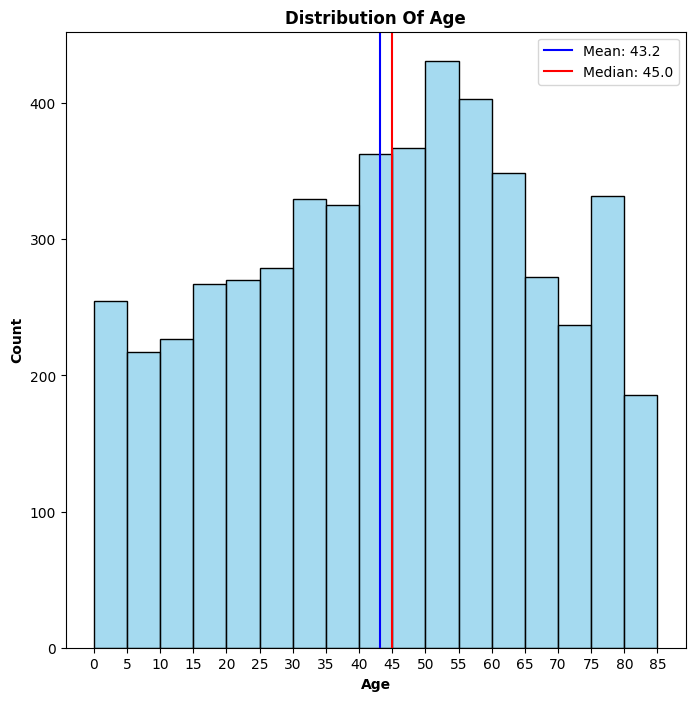

In [20]:
histogram_plot(data['age'], title='Distribution Of Age', xlabel='Age', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(age_min), int(age_max + 5),5))

&rarr; The distribution of ages are relatively even

+ Probability Density

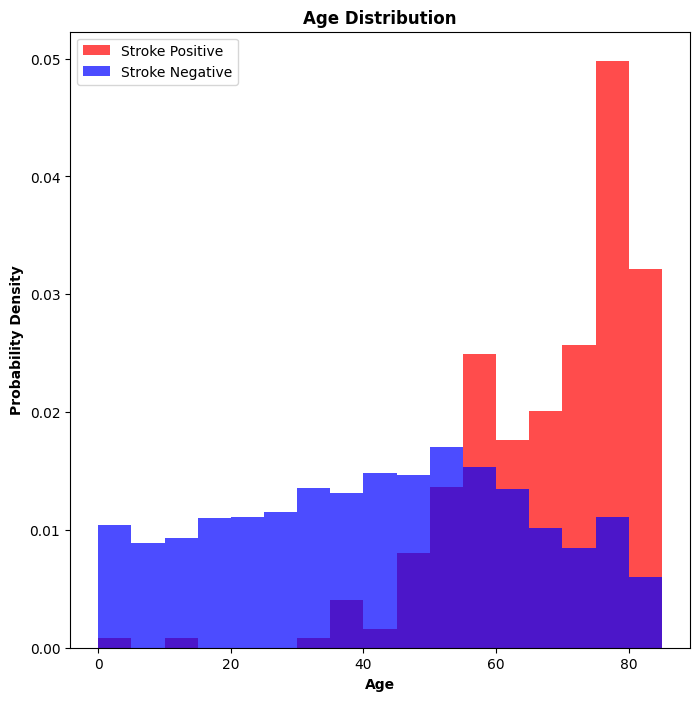

In [21]:
density_plot(data, col1='age', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Age Distribution', xlabel='Age', ylabel='Probability Density', bins=range(int(age_min), int(age_max + 5),5))

&rarr; We clearly see that the older people get, the more likely conveyed people get stroke. <br>
&rarr; **This piece of information is important for predicting stroke**

<h4>Average Glucose Level Column</h4>

+ Did you know : Chemical formula for Glucose is C6H12O6

In [22]:
glu_mean = data['avg_glucose_level'].mean()
glu_median = data['avg_glucose_level'].median()
glu_min = data['avg_glucose_level'].min()
glu_max = data['avg_glucose_level'].max()
glu_std = data['avg_glucose_level'].std()

print(f"Mean glucose level: {glu_mean}")
print(f"Median glucose level: {glu_median}")
print(f"Min glucose level: {glu_min}")
print(f"Max glucose level: {glu_max}")
print(f"Standard deviation of glucose level: {glu_std}")

Mean glucose level: 106.1476771037182
Median glucose level: 91.88499999999999
Min glucose level: 55.12
Max glucose level: 271.74
Standard deviation of glucose level: 45.28356015058198


* The percentage of missing values

In [23]:
print("Percentage of missing values in glucose level: ", (data['avg_glucose_level'].isnull().sum() / len(data['avg_glucose_level']))*100)

Percentage of missing values in glucose level:  0.0


+ No negative or missing value detected<br>
&rarr; Not Abnormal

+ Glucose level distribution

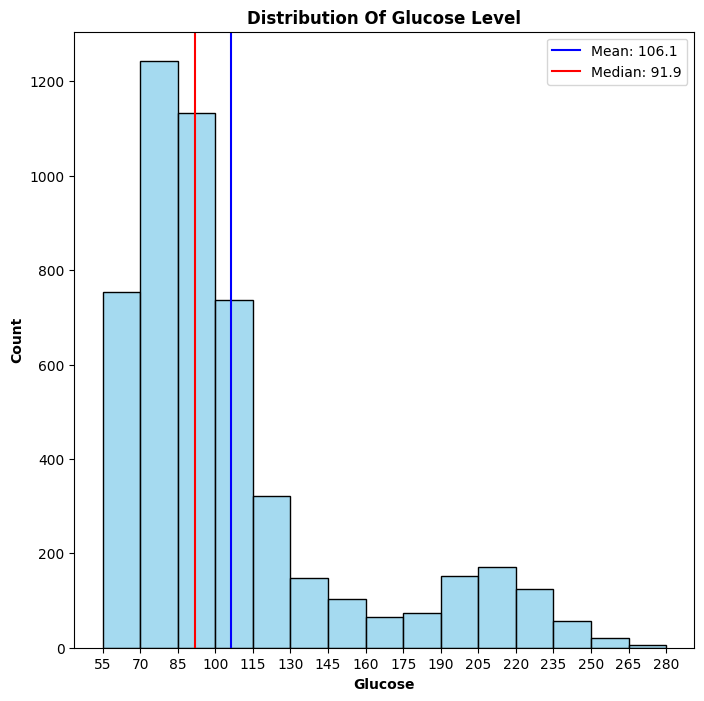

In [24]:
histogram_plot(data['avg_glucose_level'], title='Distribution Of Glucose Level', xlabel='Glucose', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(glu_min), int(glu_max + 15),15))

&rarr; The distribution of glucose level is skewed in positive direction, with most value come from the range of 55 to 115 </br>
&rarr; **The majority of individuals have relatively lower glucose levels. However, there is a significant number of individuals with higher glucose levels, contributing to the positive skew. This distribution could be indicative of a population with a mix of healthy individuals and those with potential glucose regulation issues**

+ Probability Density

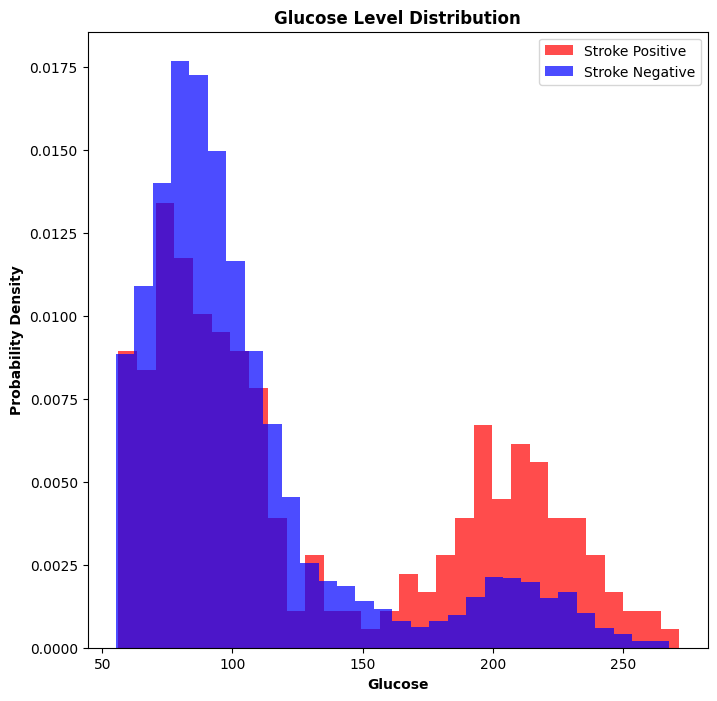

In [25]:
density_plot(data, col1='avg_glucose_level', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title = 'Glucose Level Distribution', xlabel='Glucose', ylabel='Probability Density', bins=30)

&rarr; Something happens when we follow the Glucose level as it raise from 150 to 250. We notice that stroke possibility is significantly more than no stroke </br>
&rarr; Both groups exhibit a positively skewed distribution. This means that there are more individuals with lower glucose levels compared to higher ones </br>
&rarr; **The histogram suggests that individuals with a history of stroke have a higher proportion of individuals with higher glucose levels**

<h4> BMI Column </h4>

+ Descriptive Statistic

In [26]:
bmi_mean = data['bmi'].mean()
bmi_median = data['bmi'].median()
bmi_min = data['bmi'].min()
bmi_max = data['bmi'].max()
bmi_std = data['bmi'].std()

# Print the results
print(f"Mean BMI: {bmi_mean}")
print(f"Median BMI: {bmi_median}")
print(f"Min BMI: {bmi_min}")
print(f"Max BMI: {bmi_max}")
print(f"Standard deviation of BMI: {bmi_std}")

Mean BMI: 28.893236911794666
Median BMI: 28.1
Min BMI: 10.3
Max BMI: 97.6
Standard deviation of BMI: 7.854066729680164


+ No negative value<br>
&rarr; Not Abnormal

+ Value Distribution

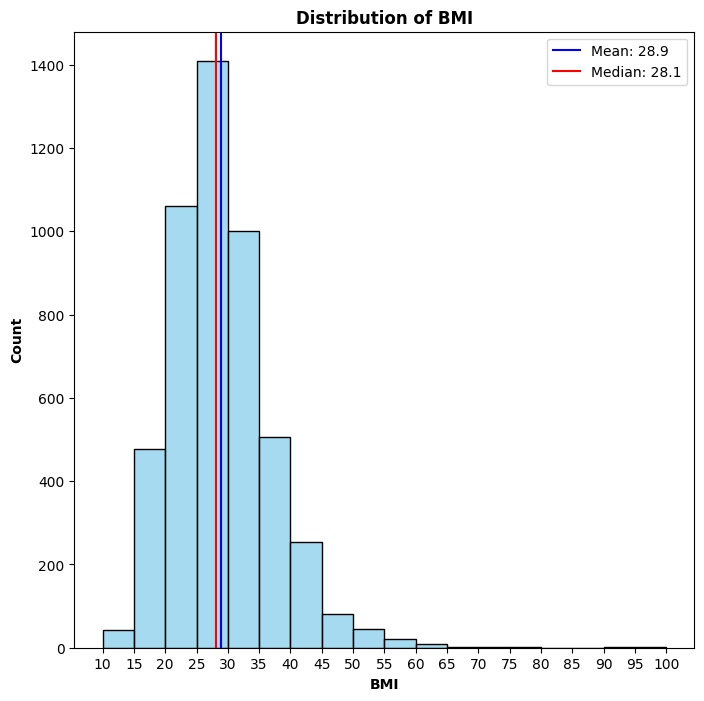

In [27]:
histogram_plot(data['bmi'], title='Distribution of BMI', xlabel='BMI', ylabel='Count', mean_line=True, median_line=True, color='skyblue', bins=range(int(bmi_min), int(bmi_max + 5), 5))


&rarr; The BMI distribution is **positively skewed** in positive direction with most values come from the range of 15 to 45. However, there are some outliers at the range of 90-100, those may cause noise <br>
&rarr; **The histogram suggests that the majority of individuals in this dataset have a BMI in the overweight range. However, there is a significant number of individuals with higher BMI values, contributing to the positive skew. This distribution could be indicative of a population with a high prevalence of overweight and obesity**

+ Probability Density

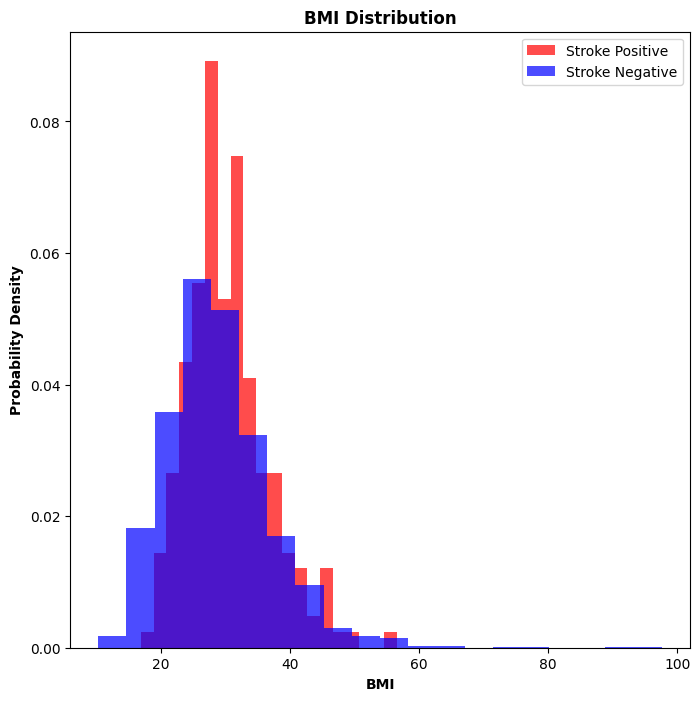

In [28]:
density_plot(data, col1='bmi', col2='stroke', label1='Stroke Positive', label2='Stroke Negative', title='BMI Distribution', xlabel='BMI', ylabel='Probability Density', bins=20)


&rarr; Both Stoke Positive and Negative have the BMI value distributed evenly, the probability get very high at the range 20-40, especially for Stroke Positive<br>
&rarr; Both groups exhibit a positively skewed distribution<br>
&rarr; **The observed difference in BMI distribution between the two groups raises the possibility of an association between higher BMI and the risk of stroke**

<h3>Categorical columns exploration</h3>

<h4>Gender Column</h4>

- Distribution of values

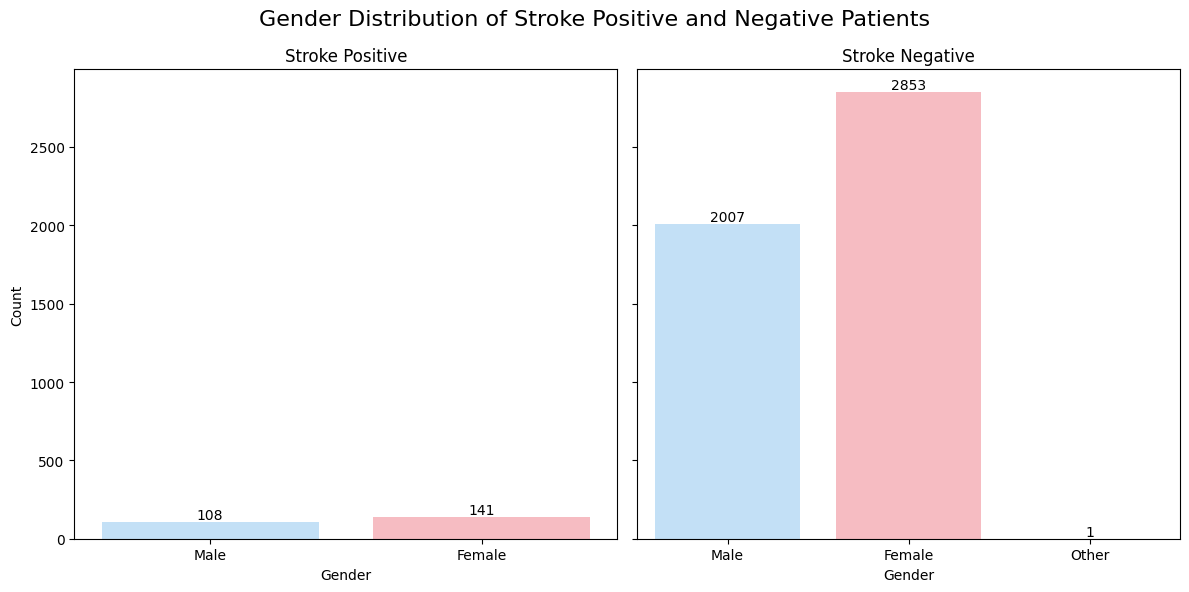

In [29]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

pastel_colors = ['#bae1ff', '#ffb3ba', '#baffc9']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='gender', hue='gender', data=stroke_positive, palette=pastel_colors[:2], ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='gender', hue='gender', data=stroke_negative, palette=pastel_colors, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Gender Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [30]:
print("Percentage of missing values in gender: ", (data['gender'].isnull().sum() / len(data)) * 100)

Percentage of missing values in gender:  0.0


- Different values

In [31]:
print("Number of different gender: ", len(data['gender'].unique()))
print("Different genders: ", data['gender'].unique())

Number of different gender:  3
Different genders:  ['Male' 'Female' 'Other']


- <b>Abnormal</b>: 'Other' gender has only one record, which can be the outliner element. We can remove it from the dataset without causing any problem.

&rarr; <b>Gender seems not to be a risk factor</b>: The visual data reveals that the male-to-female ratio in the stroke-positive plot closely mirrors that of the stroke-negative plot.

<h4>Hypertension Column</h4>

- Distribution of values

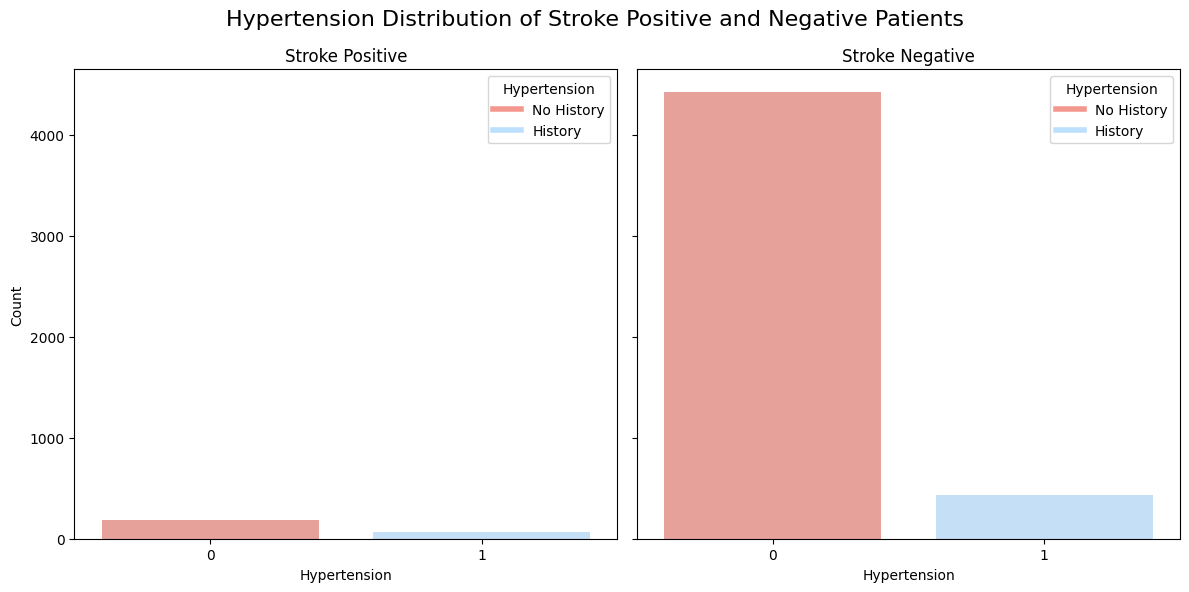

In [32]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Hypertension')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Hypertension')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='hypertension', hue='hypertension', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Hypertension')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Hypertension')

# Set the main title
plt.suptitle("Hypertension Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [33]:
print("Percentage of missing values in hypertension: ", (data['hypertension'].isnull().sum() / len(data)) * 100)

Percentage of missing values in hypertension:  0.0


&rarr; In both stroke-positive and stroke-negative populations, **hypertension is not overwhelmingly present**. Most patients, regardless of stroke status, do not have a history of hypertension. However, it is important to note that patients with a history of hypertension are more common in the stroke-negative group

&rarr; **Hypertension does not appear to be the sole or dominant factor contributing to stroke**

<h4>Heart Disease Column</h4>

- Distribution of values

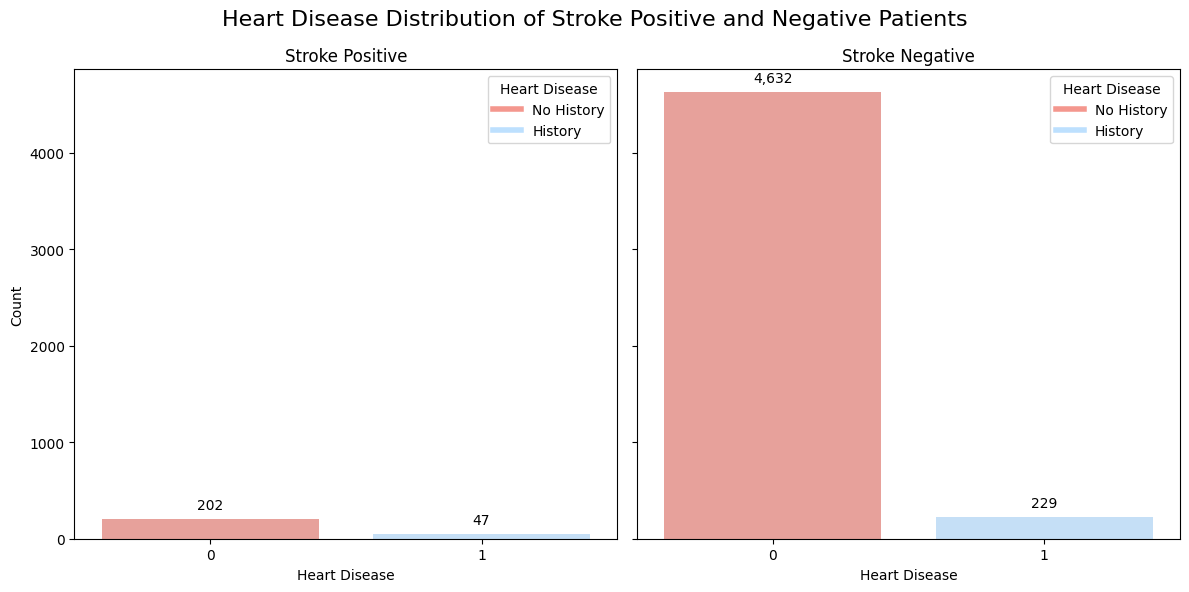

In [34]:
# Hypertension
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotting Hypertension Distribution for Stroke Positive patients
sns.countplot(x='heart_disease', hue='heart_disease',palette=['#f4978e', '#bde0fe'], data=stroke_positive, ax=axes[0], legend=False)
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel('Heart Disease')
axes[0].set_ylabel('Count')

# Create a custom legend for the Stroke Positive plot
handles_positive = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[0].legend(handles_positive, ['No History', 'History'], title='Heart Disease')

# Plotting Hypertension Distribution for Stroke Negative patients
sns.countplot(x='heart_disease', hue='heart_disease', palette=['#f4978e', '#bde0fe'], data=stroke_negative, ax=axes[1], legend=False)
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel('Heart Disease')

# Create a custom legend for the Stroke Negative plot
handles_negative = [plt.Line2D([0], [0], color="#f4978e", lw=4),
                    plt.Line2D([0], [0], color="#bde0fe", lw=4)]
axes[1].legend(handles_negative, ['No History', 'History'], title='Heart Disease')

# Put values on top of the bars
for p in axes[0].patches:
    axes[0].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
for p in axes[1].patches:
    axes[1].annotate(format(int(p.get_height()), ','), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    
# Set the main title
plt.suptitle("Heart Disease Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


- Percentage of missing values

In [35]:
print("Percentage of missing values in heart disease: ", (data['heart_disease'].isnull().sum() / len(data)) * 100)

Percentage of missing values in heart disease:  0.0


- Different values

In [36]:
print("Number of different heart_disease: ", len(data['heart_disease'].unique()))
print("Different heart_disease: ", data['heart_disease'].unique())

Number of different heart_disease:  2
Different heart_disease:  [1 0]


&rarr; Both stroke-positive and stroke-negative patients are more likely to have no history of heart disease. However, the proportion of stroke-positive patients with heart disease history is higher than that of stroke-negative patients, indicating **a possible association between heart disease history and stroke risk**

<h4>Ever Married Column</h4>

- Distribution of values

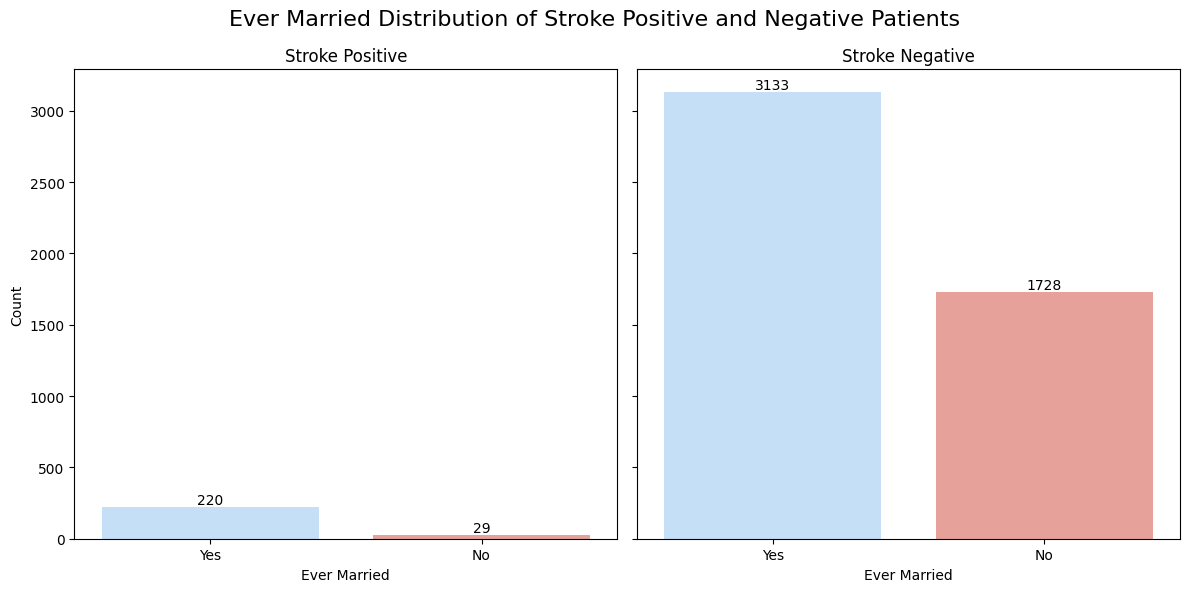

In [37]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.countplot(x='ever_married', hue='ever_married', data=stroke_positive, palette=['#bde0fe', '#f4978e'], ax=axes[0], legend=False, order=['Yes', 'No'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Ever Married")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='ever_married', hue='ever_married', data=stroke_negative, palette=['#f4978e', '#bde0fe'], ax=axes[1], legend=False, order=['Yes', 'No'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Ever Married") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Ever Married Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.tight_layout()
plt.show()

- Percentage of missing values

In [38]:
print("Percentage of missing values in ever_married: ", (data['ever_married'].isnull().sum() / len(data)) * 100)

Percentage of missing values in ever_married:  0.0


- Different values

In [39]:
print("Number of different ever_married: ", len(data['ever_married'].unique()))
print("Different ever_married: ", data['ever_married'].unique())

Number of different ever_married:  2
Different ever_married:  ['Yes' 'No']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>"Ever Married" could be a risk factor</b>: The visual data indicates that the likelihood of stroke is significantly higher among married individuals compared to those who are unmarried.

<h4>Work Type Column</h4>

- Distribution of values

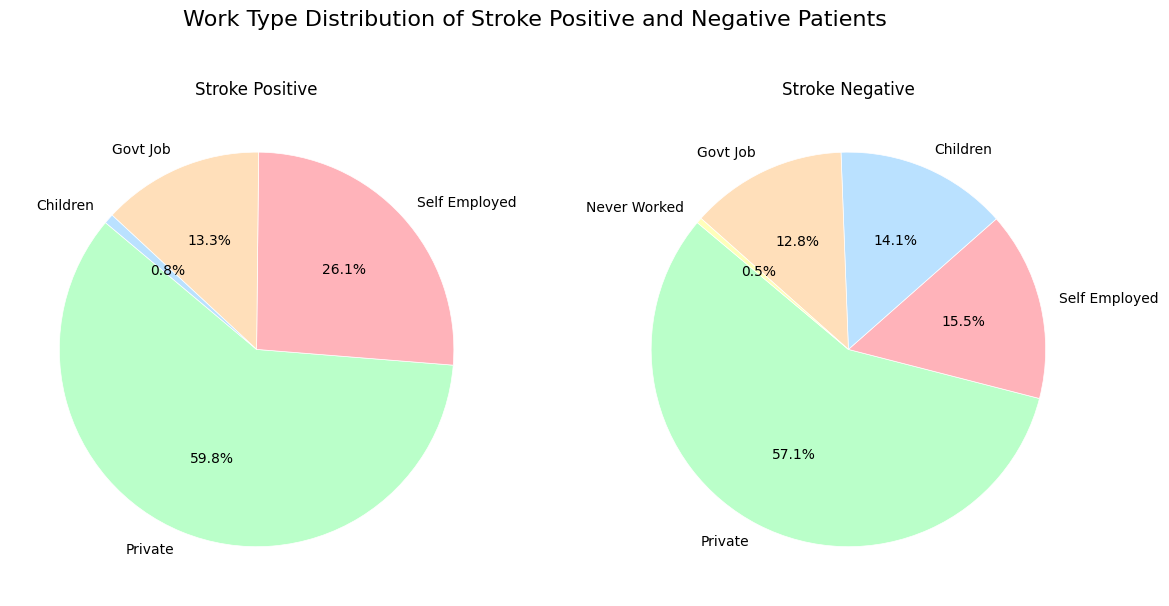

In [40]:
stroke_positive_counts = stroke_positive['work_type'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['work_type'].value_counts(normalize=True) * 100

pos_labels = ['Private', 'Self Employed', 'Govt Job', 'Children']
neg_labels = ['Private', 'Self Employed', 'Children', 'Govt Job', 'Never Worked']


colors = {
    'Children': '#bae1ff',
    'Govt Job': '#ffdfba',
    'Never Worked': '#ffffba',
    'Private': '#baffc9',
    'Self Employed': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Work Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [41]:
print("Percentage of missing values in work_type: ", (data['work_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in work_type:  0.0


- Different values

In [42]:
print("Number of different work_type: ", len(data['work_type'].unique()))
print("Different work_type: ", data['work_type'].unique())

Number of different work_type:  5
Different work_type:  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Work Type could be a risk factor</b>:
-  <b>Self-employed people have a high rate of having a stroke</b>: The visual data reveals a higher proportion of self-employed individuals in the stroke-positive plot compared to the stroke-negative plot.
-  <b>Children have a very low risk of having a stroke</b>: The visual data shows that children make up a very small proportion in the stroke-positive plot, at less than 1%, whereas in the stroke-negative plot, they account for up to 14.1%.

<h4>Residence Type Column</h4>

- Distribution of values

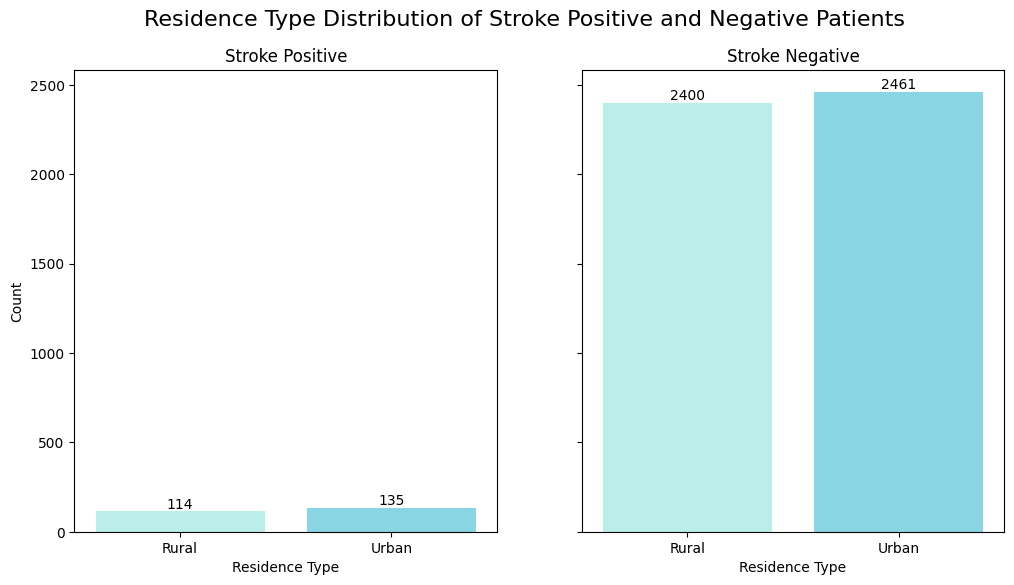

In [43]:
stroke_positive = data[data['stroke'] == 1]
stroke_negative = data[data['stroke'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_positive, palette=['#7bdff2', '#b2f7ef'], ax=axes[0], legend=False, order=['Rural', 'Urban'])
axes[0].set_title('Stroke Positive')
axes[0].set_xlabel("Residence Type")
axes[0].set_ylabel("Count")

for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

sns.countplot(x='Residence_type', hue='Residence_type', data=stroke_negative, palette=['#b2f7ef', '#7bdff2'], ax=axes[1], legend=False, order=['Rural', 'Urban'])
axes[1].set_title('Stroke Negative')
axes[1].set_xlabel("Residence Type") 
axes[1].set_ylabel("Count")

for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height(), 
                 int(p.get_height()), ha='center', va='bottom')

plt.suptitle("Residence Type Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [44]:
print("Percentage of missing values in Residence_type: ", (data['Residence_type'].isnull().sum() / len(data)) * 100)

Percentage of missing values in Residence_type:  0.0


- Different values

In [45]:
print("Number of different Residence_type: ", len(data['Residence_type'].unique()))
print("Different Residence_type: ", data['Residence_type'].unique())

Number of different Residence_type:  2
Different Residence_type:  ['Urban' 'Rural']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Residence Type seems not to be a risk factor</b>: The rate of stroke among people living in urban areas is strikingly similar to that of those living in rural areas.

<h4>Smoking Status Column</h4>

- Distribution of values

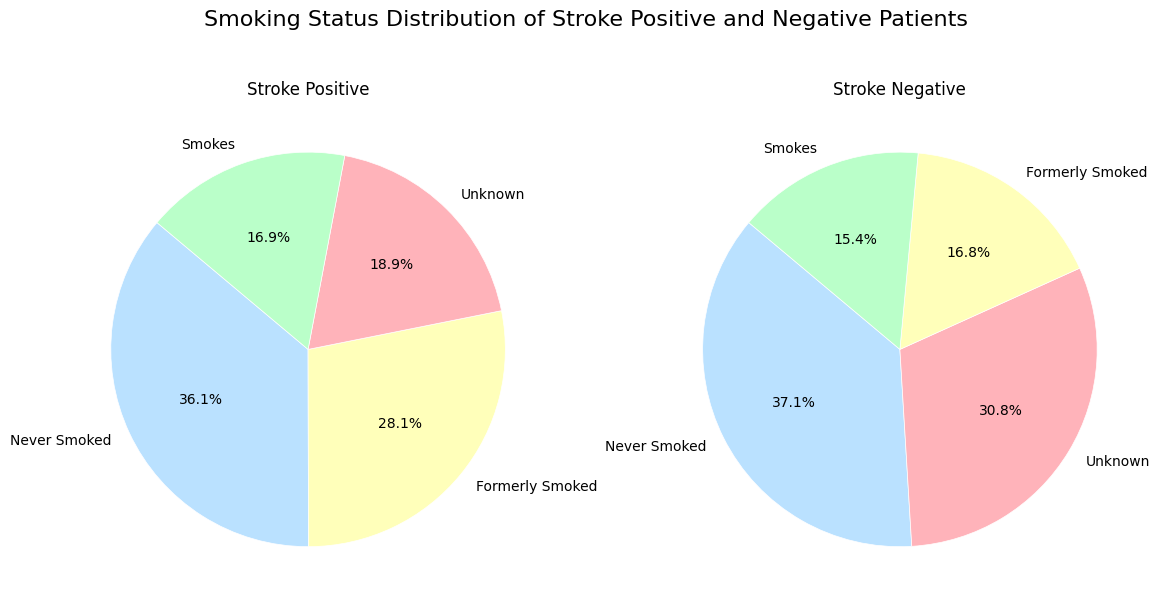

In [46]:
stroke_positive_counts = stroke_positive['smoking_status'].value_counts(normalize=True) * 100
stroke_negative_counts = stroke_negative['smoking_status'].value_counts(normalize=True) * 100

pos_labels = ['Never Smoked', 'Formerly Smoked', 'Unknown', 'Smokes']
neg_labels = ['Never Smoked', 'Unknown', 'Formerly Smoked', 'Smokes']

colors = {
    'Never Smoked': '#bae1ff',
    'Formerly Smoked': '#ffffba',
    'Smokes': '#baffc9',
    'Unknown': '#ffb3ba'
}

pos_colors = [colors[label] for label in pos_labels]
neg_colors = [colors[label] for label in neg_labels]

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].pie(stroke_positive_counts, labels=pos_labels, autopct='%1.1f%%', colors=pos_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[0].set_title("Stroke Positive")

axes[1].pie(stroke_negative_counts, labels=neg_labels, autopct='%1.1f%%', colors=neg_colors, startangle=140, wedgeprops={'edgecolor': 'white', 'linewidth': 0.5})
axes[1].set_title("Stroke Negative")

plt.suptitle("Smoking Status Distribution of Stroke Positive and Negative Patients", fontsize=16)
plt.show()

- Percentage of missing values

In [47]:
print("Percentage of missing values in smoking_status: ", (data['smoking_status'].isnull().sum() / len(data)) * 100)

Percentage of missing values in smoking_status:  0.0


- Different values

In [48]:
print("Number of different smoking_status: ", len(data['smoking_status'].unique()))
print("Different smoking_status: ", data['smoking_status'].unique())

Number of different smoking_status:  4
Different smoking_status:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


&rarr; <b>Nothing seems abnormal</b>

&rarr; <b>Smoking status could be a risk factor:</b>
- <b>Individuals who have a history of smoking or are currently smokers face a greater risk of experiencing a stroke</b>: The proportion of individuals who have smoked or are current smokers is greater in the stroke-positive plot compared to the stroke-negative plot.
- <b>Non-smokers have a lower incidence of stroke</b>: The proportion of non-smokers in the stroke-positive plot is lower than that in the stroke-negative plot.

<div id = "preprocessing"><h2>4. Preprocessing data </h2></div>

<h3> Categorial Encoder </h3>

In [49]:
# Drop id column
data = data.drop('id', axis=1)
# Encoding categorical data

gender_dict = {'Male' : 0, 'Female' : 1, 'Other' : 2}
married_dict = {'No' : 0, 'Yes' : 1}
work_type_dict = {'children' : 0, 'Never_worked' : 1, 'Govt_job' : 2, 'Private' : 3, 'Self-employed':4}
residence_type_dict = {'Rural' : 0, 'Urban' : 1}
smoking_dict = {'Unknown' : 0, 'never smoked' : 1, 'formerly smoked' : 2, 'smokes' : 3}

def category_encoder(label, value_dict):
    if label in value_dict:
        return value_dict[label]
    else:
        return -1

data['gender'] = data['gender'].apply(category_encoder, args=(gender_dict,))
data['ever_married'] = data['ever_married'].apply(category_encoder, args=(married_dict,))
data['work_type'] = data['work_type'].apply(category_encoder, args=(work_type_dict,))
data['Residence_type'] = data['Residence_type'].apply(category_encoder, args=(residence_type_dict,))
data['smoking_status'] = data['smoking_status'].apply(category_encoder,args=(smoking_dict,))

<h3> Handle Missing Value </h3>


+ We can use **Decision Tree strategy** to fill in missing value, because as above analysis, the missing values in **bmi** column is **MAR**, which means using associated features (e.g., through predictive imputation) is likely to provide better accuracy than simply replacing missing values with the mean or median

<Axes: >

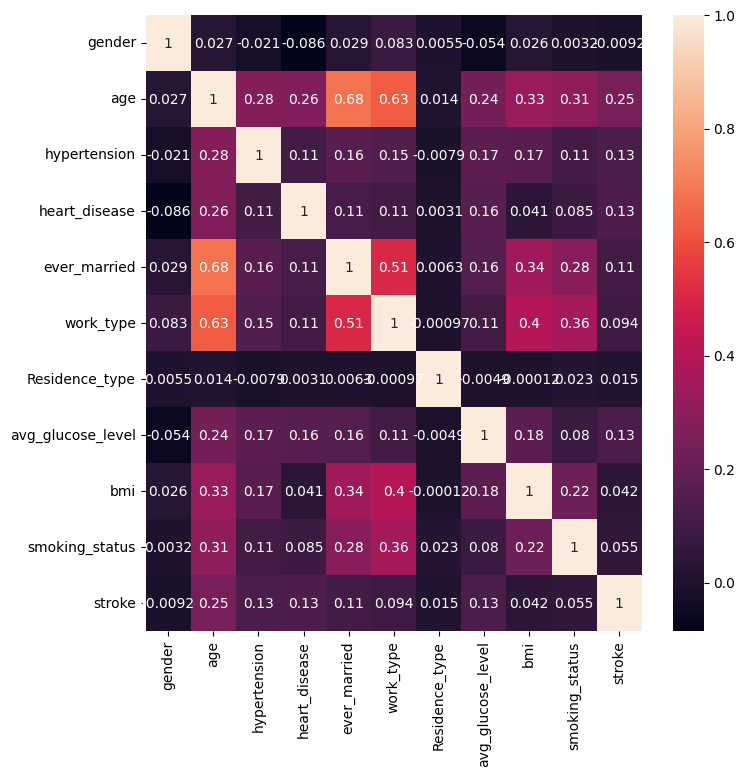

In [50]:
# Check correlation between features
plt.figure(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True)

- As can be seen that, **age, hypertension, ever_married and work_type** have the highest correlation rate with **bmi**, therefore, we will pick these 3 features for **Decision Tree Regressor**

In [51]:
train_columns = [1,4,5]

data_copy = data[data['bmi'].notnull()].copy()

data_copy = data_copy.sample(frac=1).reset_index(drop=True)

X = data_copy.iloc[:, train_columns].values
y = data_copy.iloc[:, 8].values
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



[28.3 28.8 27.5 ... 32.8 27.7 28.9]


In [52]:
def scaleDataset(X):
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X

X_train = scaleDataset(X_train)
X_test = scaleDataset(X_test)


In [53]:

decision_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)


In [54]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Model Report : ")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R2 Score (R²): {r2:.2f}")

Regression Model Report : 
Mean Absolute Error (MAE): 5.13
Mean Squared Error (MSE): 52.96
R2 Score (R²): 0.22


&rarr; This strategy give better result than using Mean strategy

+ We start fill in missing value with output predicted by our model

In [55]:
missing_idx = data[data['bmi'].isnull()].index

for i in missing_idx:
    X_i = data.iloc[i, train_columns].values
    X_i = scaleDataset(X_i[:, np.newaxis]).reshape(1,-1)
    y_pred = decision_tree.predict(X_i)
    data.loc[i, 'bmi'] = y_pred

In [56]:
data['bmi'].isnull().sum()

np.int64(0)

&rarr; Phew!!, No more missing value

<div id = "questions"> <h2> 5. Questions </h2> </div>

<div id = "question-1"> <h3>5.1. Question 1 </h3></div>

**A question:** How do multiple factors such as **`age`**, **`hypertension`**, **`heart_disease`** and **`avg_glucose_level`** relate to stroke, from there we will choose 2 features having the highest influence on stroke and see how these features affect each other

**Answer this question will help us:**
- Identify the most influential factors that contribute to stroke risk. By understanding how **`age`**, **`hypertension`**, **`heart disease`**, and **`average glucose levels`** relate to stroke, we can pinpoint which of these factors have the highest impact.
- Make informed decisions on prioritizing interventions or treatments. For example, if certain factors like age or hypertension are more strongly related to stroke, healthcare providers can target those areas for better prevention.
- Understand the combined effects of multiple factors on stroke risk. By investigating how two features with the highest influence on stroke interact, we can assess whether these factors have a synergistic effect or if one factor alone has a stronger influence.

**How to answer:**
- Exploring Each Factor’s Individual Impact on Stroke: using Logistic Regression to assess the odds of stroke based on these factors.
- Investigating Interactions Between the Two Most Influential Factors:
    - Interaction Terms: If the two most influential factors are, for example, age and hypertension, explore how they jointly affect stroke risk.
    - Visualization: Visualize the relationship between these two factors and stroke to identify patterns or synergistic effects.
- Concluding Insights:
    - Summarize how each factor affects stroke risk.
    - Highlight the two most influential features and explain their combined impact.
    - Suggest possible preventive measures or areas of focus based on the findings.

### Preprocessing

First we will need to import Logistic Regression for Hypothesis Testing

In [57]:
import statsmodels.api as sm

Secondly, create the model with intercept for Logistic Regression and features like **`age`**, **`hypertension`**, **`heart_disease`** and **`avg_glucose_level`**

In [58]:
data_copy = data.copy()
data['intercept'] = 1   
lm = sm.Logit(data['stroke'], data[[ 'intercept', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.155720
         Iterations 9


### Analysis

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Mon, 25 Nov 2024   Pseudo R-squ.:                  0.2004
Time:                        15:02:28   Log-Likelihood:                -795.73
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 4.774e-85
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -7.4894      0.358    -20.927      0.000      -8.191      -6.788
age                   0.0689      0.005     13.409      0.000       0.059       0.079
hypertension          0.3814      0.163      2.346      0.019       0.063       0.700
heart_disease         0.3300      0.188      1.758      0.079      -0.038       0.698
avg_glucose_level     0.0041      0.001      3.546      0.000       0.002       0.006
=====================================================================================
"""

- **`Age:`** 0.0689, highly significant (p = 0.000 < 0.001). For each one-year increase in age, the odds of having a stroke increase by approximately 𝑒^0.0689 ≈ 1.071(about a 7.1% increase).

- **`Hypertension:`** 0.3814, significant (p = 0.019 < 0.05). Having hypertension increases the odds of stroke by about 𝑒^0.3814 ≈ 1.464 (a 46.4% increase).

- **`Heart Disease:`** 0.3300, not statistically significant at the 5% level (p = 0.079). This suggests that, in this model, having heart disease is not a strong predictor of stroke, though it might have some effect.

- **`Average Glucose Level:`** 0.0041, highly significant (p = 0.000 < 0.001). For each unit increase in average glucose level, the odds of having a stroke increase by 𝑒^0.0041 ≈ 1.004 (a 0.4% increase).

&rarr; **`Age`** and **`Average Glucose Level`** seem to be strong predictors of stroke based on their significance and effect size.    

Third, to have clearer view, we will have a sub question:

**How does the combination of **`Age`** and **`Average Glucose Level`** influence the stroke rate**

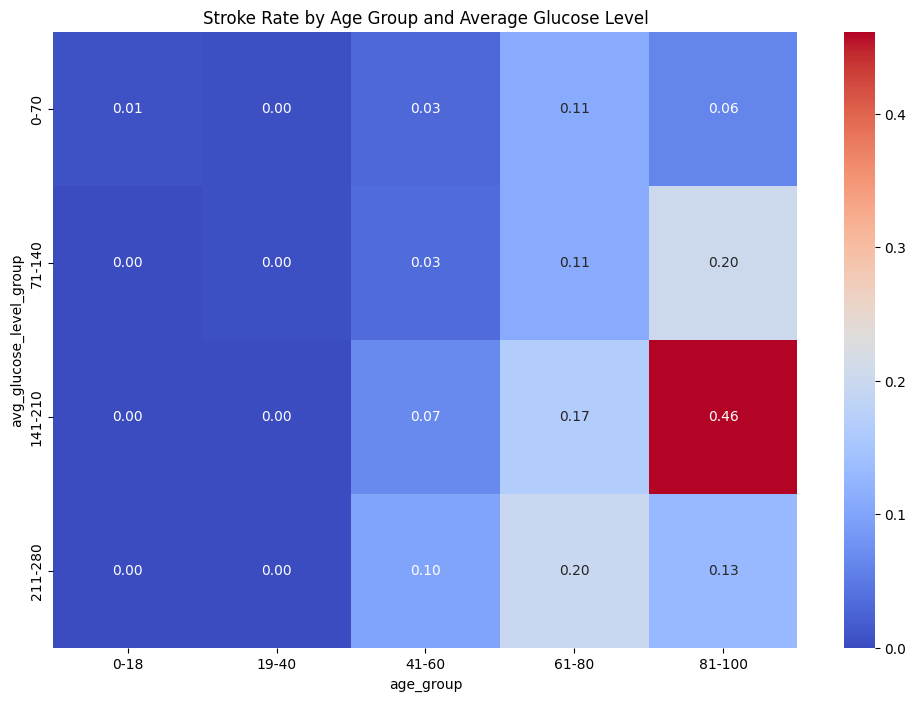

In [60]:
data_tmp = data.copy()
data_tmp['age_group'] = pd.cut(data_tmp['age'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81-100'])

data_tmp['avg_glucose_level_group'] = pd.cut(data_tmp['avg_glucose_level'], bins=[0, 70, 140, 210, 280, 350], labels=['0-70', '71-140', '141-210', '211-280', '281-350'])

pivot_table = data_tmp.pivot_table(values='stroke', index='avg_glucose_level_group', columns='age_group', aggfunc='mean', observed=True)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Stroke Rate by Age Group and Average Glucose Level')
plt.show()

In [61]:
# Print the correlation matrix using print
print(pivot_table)

age_group                    0-18     19-40     41-60     61-80    81-100
avg_glucose_level_group                                                  
0-70                     0.006803  0.004785  0.030568  0.109677  0.062500
71-140                   0.001403  0.004970  0.032957  0.109012  0.203125
141-210                  0.000000  0.000000  0.067901  0.165803  0.461538
211-280                  0.000000  0.000000  0.100917  0.197368  0.130435


- `Age Group Impact:`
    - Stroke rates generally increase with age, as evident by the darker colors in the higher age groups.
    - The 61-80 age group shows the highest stroke rate across all average glucose levels.

- `Average Glucose Level Impact:`
    - Higher average glucose levels are associated with increased stroke risk, particularly in the 61-80 age group.
    - The 71-140 average glucose level group has the highest stroke rate across all age groups.
    
- `Age related risk`: Stroke rates generally increase with age regardless of avg_glucose_level, as evident by the darker colors in the higher age groups.
- `Age - Glucose interaction`: 
    - The 61-80 age group shows the highest stroke rate across all average glucose levels
    - The combination of higher age and higher average glucose levels appears to have a synergistic effect on stroke risk, as seen in the darkest cells in the top right corner of the heatmap

### Conclusion

1. **`Age`** is the Strongest Predictor:

- The sharp increase in stroke rates with age suggests targeted screening and prevention for older adults, particularly those over 60.

2. **`Hypertension Management`** is Crucial:

- Hypertension significantly increases stroke risk. Interventions to manage blood pressure (e.g., lifestyle changes, medications) can substantially reduce risk.

3. **`Monitor High Glucose Levels`**:

- Elevated glucose levels contribute to stroke risk. Managing diabetes or pre-diabetic conditions is essential, especially in older age groups.

4. **`Heart Disease May Play a Role:`**

- While not statistically significant at the 5% level, the relationship between heart disease and stroke risk warrants further investigation with a larger dataset or additional variables.

5. **`Focus on Preventative Care:`**

- Younger individuals (0-40) have low stroke rates overall, suggesting resources can be concentrated on older, high-risk groups for maximum impact.

<div id = "question-2"> <h3>5.2. Question 2 </h3></div>

**A question:** What characteristics are commonly found in stroke patients that are not present in non-stroke individuals?

**Answer this question will help us:**identify risk factors and characteristics associated with stroke, which can be crucial for:
+ **Stroke prevention**: Understand characteristics that are likely to lead to stroke, we can better target risk factors for preventive care and lifestyle changes.

+ **Early Diagnosis**: Recognizing these risk factors can help in identifying potential stroke patients early, allowing early treatment, as early treatment offers the best chance of cure.

+ **Education**: Insight information on stroke characteristics can help in educating both stroke patients and non-stroke individuals, by informing about lifestyle or specific risk profiles.

**How to answer:**
+ **Exploratory Data Analysis (EDA)**: Compare features (such as Age, BMI, Glucose Level) between stroke and non-stroke. Notice how these features change between the two groups. We can use plots and data visualization tools.

+ **Analyze health factors**: Give deep insight about factors that are related to health such as Age, Hypertension and Heart Disease, Glucose Level, and BMI. How these factors relate to stroke. Some key differences between stroke and non-stroke individuals on these factors.

+ **Compare with related research and articles**: Many doctors and researchers have conducted articles about this topic, including patient characteristics, their lifestyle, health condition, etc. We can compare our studies with these articles to have more insight into this stroke disease.

### Preprocessing

In [62]:
#Seperate stroke and no stroke
stroke_df = data[data['stroke'] == 1]
nostroke_df = data[data['stroke'] == 0]

data_copy = data.copy()

def descriptive_statistic(col):
    min = col.min()
    max = col.max()
    mean = col.mean()
    median = col.median()
    lower_quartile = col.quantile(0.25)
    upper_quartile = col.quantile(0.75)

    return {'min': min, 'max': max, 'mean': mean, 'median': median, 'lower_quartile': lower_quartile, 'upper_quartile': upper_quartile}

def age_bin(age):
    if 0 < age <= 20:
        return '0-20'
    elif 20 < age <= 40:
        return '21-40'
    elif 40 < age <= 60:
        return '41-60'
    elif 60 < age <= 80:
        return '61-80'
    else:
        return '80+'

#Reference : https://www.aia.com.vn/vi/song-khoe/loi-khuyen/tap-luyen/do-chi-so-bmi.html
def bin_bmi(bmi):
    if 0 < bmi <= 18.5:
        return 'Under weight'
    elif 18.5 < bmi <= 24.9:
        return 'Normal'
    elif 24.9 < bmi < 30:
        return 'Over weight'
    else:
        return 'Obese'

# Reference : https://my.clevelandclinic.org/health/diagnostics/9731-a1c
def glucose_level_bin(glucose_level):
    if 0 < glucose_level <= 117:
        return 'Healthy'
    elif 117 < glucose_level <= 137:
        return 'Pre Diabetes'
    else:
        return 'Diabetes'

For Numerical features, we will take age, bmi and average glucose in consider.

### Analysis

For Numerical features, we will take age, bmi and average glucose in consider.

#### **AGE:**

Let's analyze age and see how it affect stroke

**Descriptive statistic of age between 2 groups stroke and no stroke**

In [63]:

#Descriptive statistic
stroke_age_stats  = descriptive_statistic(stroke_df['age'])
nostroke_age_stats = descriptive_statistic(nostroke_df['age'])

stats_list = [
    ['Min', stroke_age_stats['min'], nostroke_age_stats['min']],
    ['Lower Quartile', stroke_age_stats['lower_quartile'], nostroke_age_stats['lower_quartile']],
    ['Median', stroke_age_stats['median'], nostroke_age_stats['median']],
    ['Mean', stroke_age_stats['mean'], nostroke_age_stats['mean']],
    ['Upper Quartile', stroke_age_stats['upper_quartile'], nostroke_age_stats['upper_quartile']],
    ['Max', stroke_age_stats['max'], nostroke_age_stats['max']]
]

# Define headers
headers = ['Statistic', 'Stroke', 'No Stroke']

# Print the table
print(tabulate(stats_list, headers=headers, tablefmt='pretty'))


+----------------+-------------------+--------------------+
|   Statistic    |      Stroke       |     No Stroke      |
+----------------+-------------------+--------------------+
|      Min       |       1.32        |        0.08        |
| Lower Quartile |       59.0        |        24.0        |
|     Median     |       71.0        |        43.0        |
|      Mean      | 67.72819277108434 | 41.971544949598844 |
| Upper Quartile |       78.0        |        59.0        |
|      Max       |       82.0        |        82.0        |
+----------------+-------------------+--------------------+


**Visualize the result via box plot**

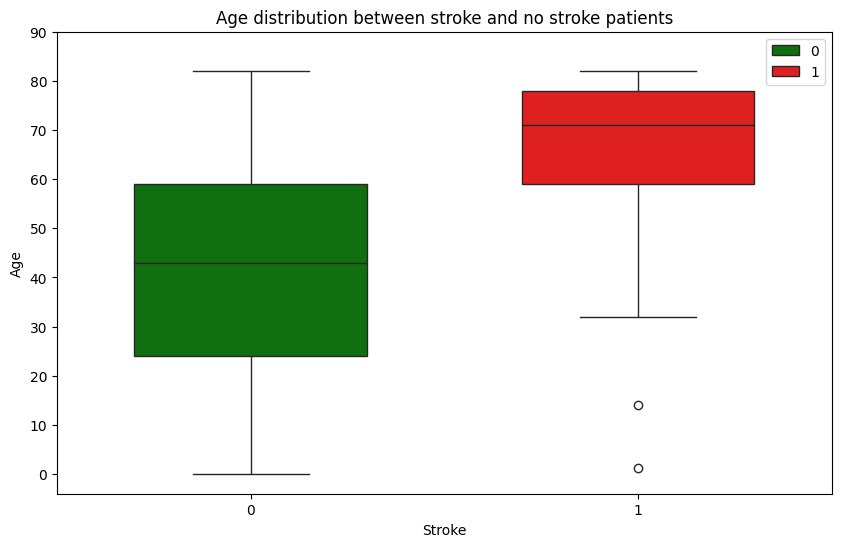

In [64]:
plt.figure(figsize=(10, 6))
plt.title('Age distribution between stroke and no stroke patients')
sns.boxplot(x = 'stroke', y = 'age', data=data, hue = 'stroke', palette={1 : 'red', 0 : 'green'}, width=0.6)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.xticks(fontsize = 10)
plt.yticks(range(0,100, 10))
plt.legend()
plt.show()

We can clearly see that age is exceptionally high among stroke paitents, compare to no stroke person

**Which group of age have the highest stroke rate**

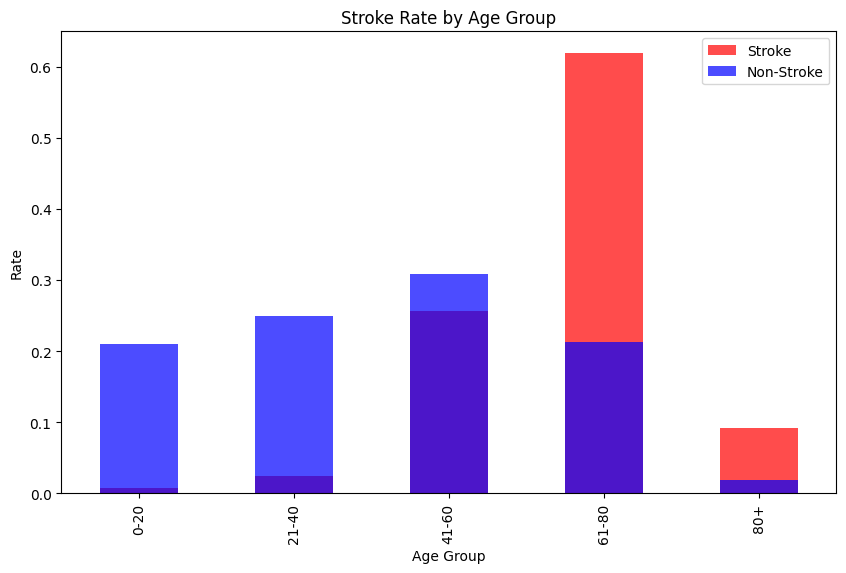

In [65]:
#Age binning

data_copy['age_group'] = data_copy['age'].apply(age_bin)

# Calculate stroke rate by age group
age_stroke_rate = data_copy[data_copy['stroke'] == 1]['age_group'].value_counts(normalize=True).sort_index()
age_non_stroke_rate = data_copy[data_copy['stroke'] == 0]['age_group'].value_counts(normalize=True).sort_index()

# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Stroke Rate by Age Group')
age_stroke_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
age_non_stroke_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('Age Group')
plt.ylabel('Rate')
plt.legend()
plt.show()

**Sumary:**

+ **Average age :**  Stroke paitent have higher average age. The average age for the stroke group is 67.73, whereas the average age for the no stroke group is 41.97. This indicates that stroke patients are typically older.

+ **Median :** The median age for the stroke group is 71, compared to 43 for the no stroke group. This shows that stroke patients tend to be older, with a middle point age that is much higher than the no stroke group.

+ **Quartiles :** The lower quartile for the stroke group is 59 and the upper quartile is 78, while for the no stroke group, the lower quartile is 24 and the upper quartile is 59. This suggests that most stroke patients are between 59 and 78 years old.

+ **Age group :** The groups of age that have the highest stroke rate are 61-80 and 80+. Indicating that the older a person get, the more likely they got stroke.

**Conclusion:**
+ In conclusion, according to this dataset, stroke patients tend to be older, with a significantly higher average and median age compared to those without stroke.

+ Older individuals, especially those over 60, are at a higher risk of having a stroke, underlining age as a crucial risk factor for stroke prediction.

#### **BMI:**

Do bmi really affect stroke like people said ?

**Descriptive statistic of BMI between 2 groups stroke and no stroke**

In [66]:
stroke_bmi_stats  = descriptive_statistic(stroke_df['bmi'])
nostroke_bmi_stats = descriptive_statistic(nostroke_df['bmi'])

stats_list = [
    ['Min', stroke_bmi_stats['min'], nostroke_bmi_stats['min']],
    ['Lower Quartile', stroke_bmi_stats['lower_quartile'], nostroke_bmi_stats['lower_quartile']],
    ['Median', stroke_bmi_stats['median'], nostroke_bmi_stats['median']],
    ['Mean', stroke_bmi_stats['mean'], nostroke_bmi_stats['mean']],
    ['Upper Quartile', stroke_bmi_stats['upper_quartile'], nostroke_bmi_stats['upper_quartile']],
    ['Max', stroke_bmi_stats['max'], nostroke_bmi_stats['max']]
]

# Define headers
headers = ['Statistic', 'Stroke', 'No Stroke']

# Print the table
print(tabulate(stats_list, headers=headers, tablefmt='pretty'))

+----------------+-------------------+--------------------+
|   Statistic    |      Stroke       |     No Stroke      |
+----------------+-------------------+--------------------+
|      Min       |       16.9        |        10.3        |
| Lower Quartile |       27.0        |        23.6        |
|     Median     |       31.0        |        28.3        |
|      Mean      | 31.01851851851852 | 28.990479782395024 |
| Upper Quartile | 33.87777777777777 |        33.8        |
|      Max       |       56.6        |        97.6        |
+----------------+-------------------+--------------------+


**Visualize the result via box plot**

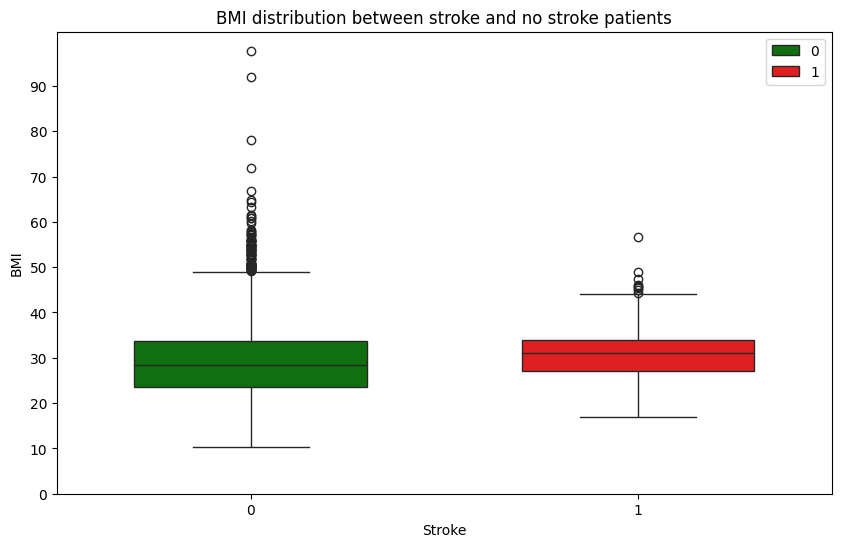

In [67]:
plt.figure(figsize=(10, 6))
plt.title('BMI distribution between stroke and no stroke patients')
sns.boxplot(x = 'stroke', y = 'bmi', data=data, hue = 'stroke', palette={1 : 'red', 0 : 'green'}, width=0.6)
plt.yticks(range(0,100, 10))
plt.ylabel('BMI')
plt.xlabel('Stroke')
plt.legend()
plt.show()


**Visualize the stroke rate between groups of BMI**

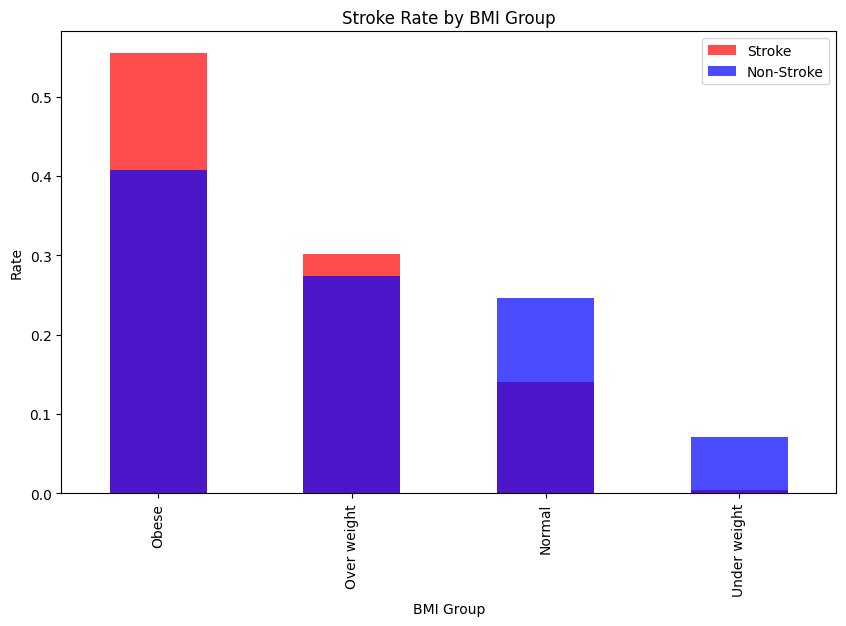

In [68]:
data_copy['bmi_group'] = data_copy['bmi'].apply(bin_bmi)

# Calculate stroke rate by bmi group
bmi_stroke_rate = data_copy[data_copy['stroke'] == 1]['bmi_group'].value_counts(normalize=True)
bmi_non_stroke_rate = data_copy[data_copy['stroke'] == 0]['bmi_group'].value_counts(normalize=True)

# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Stroke Rate by BMI Group')
bmi_stroke_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
bmi_non_stroke_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('BMI Group')
plt.ylabel('Rate')
plt.legend()
plt.show()

**Sumary**:
+ **Average** : Stroke patients have a slightly higher average BMI (31.12) compared to non-stroke patients (29.01). This suggests that, on average, stroke patients may be more likely to have a higher BMI, potentially indicating a link between higher BMI and stroke risk.

+ **Median** : The median BMI for stroke patients (31.0) is also higher than for non-stroke patients (28.3), reinforcing the trend that stroke patients tend to have higher BMI values.

+ **Quartiles** : Both lower quartile and upper quartile of stroke paitent is slightly higher compare to no stroke person.

+ **BMI groups** : It can be observed that Obese and Overweight are the group that have highest stroke rate. Therefore Normal and Under weight people tend to suffer less from stroke.


**Conclusion:**
+ In conclusion, according to this dataset, stroke patients tend to have higher BMI values. In other words, obesity appears to increase chance of stroke

#### **AVERAGE GLUCOSE LEVEL**

Did you know : The IDF Diabetes Atlas (2021) reports that 10.5% of the adult population (20-79 years old) has diabetes.

**Descriptive statistic of average glucose level between 2 groups stroke and no stroke**

In [69]:
stroke_glucose_stats  = descriptive_statistic(stroke_df['avg_glucose_level'])
nostroke_glucose_stats = descriptive_statistic(nostroke_df['avg_glucose_level'])

stats_list = [
    ['Min', stroke_glucose_stats['min'], nostroke_glucose_stats['min']],
    ['Lower Quartile', stroke_glucose_stats['lower_quartile'], nostroke_glucose_stats['lower_quartile']],
    ['Median', stroke_glucose_stats['median'], nostroke_glucose_stats['median']],
    ['Mean', stroke_glucose_stats['mean'], nostroke_glucose_stats['mean']],
    ['Upper Quartile', stroke_glucose_stats['upper_quartile'], nostroke_glucose_stats['upper_quartile']],
    ['Max', stroke_glucose_stats['max'], nostroke_glucose_stats['max']]
]

# Define headers
headers = ['Statistic', 'Stroke', 'No Stroke']

# Print the table
print(tabulate(stats_list, headers=headers, tablefmt='pretty'))


+----------------+--------------------+--------------------+
|   Statistic    |       Stroke       |     No Stroke      |
+----------------+--------------------+--------------------+
|      Min       |       56.11        |       55.12        |
| Lower Quartile |       79.79        |       77.12        |
|     Median     |       105.22       |       91.47        |
|      Mean      | 132.54473895582328 | 104.79551326887471 |
| Upper Quartile |       196.71       |       112.83       |
|      Max       |       271.74       |       267.76       |
+----------------+--------------------+--------------------+


**Visualize the result via box plot**

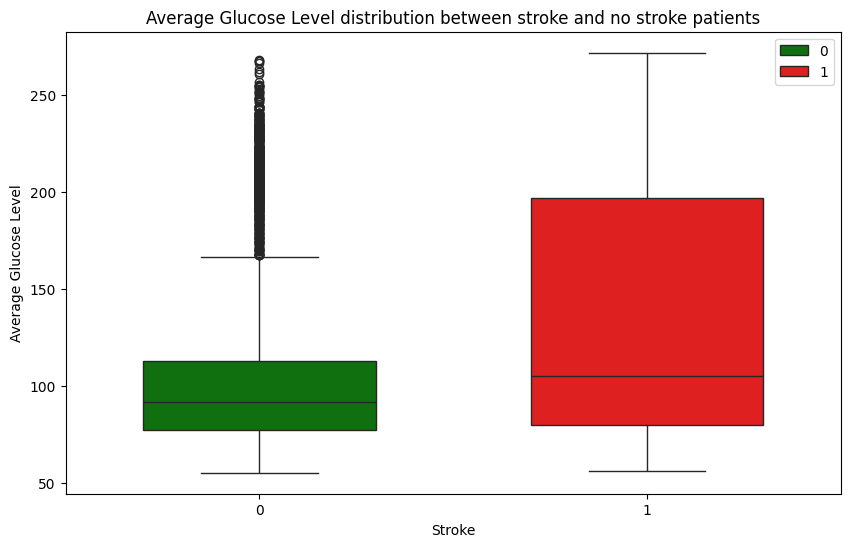

In [70]:

plt.figure(figsize=(10, 6))
plt.title('Average Glucose Level distribution between stroke and no stroke patients')
sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data=data, hue = 'stroke', palette={1 : 'red', 0 : 'green'}, width=0.6)
plt.xlabel('Stroke')
plt.ylabel('Average Glucose Level')
plt.legend()
plt.show()


**Do diabetes affect stroke ?**

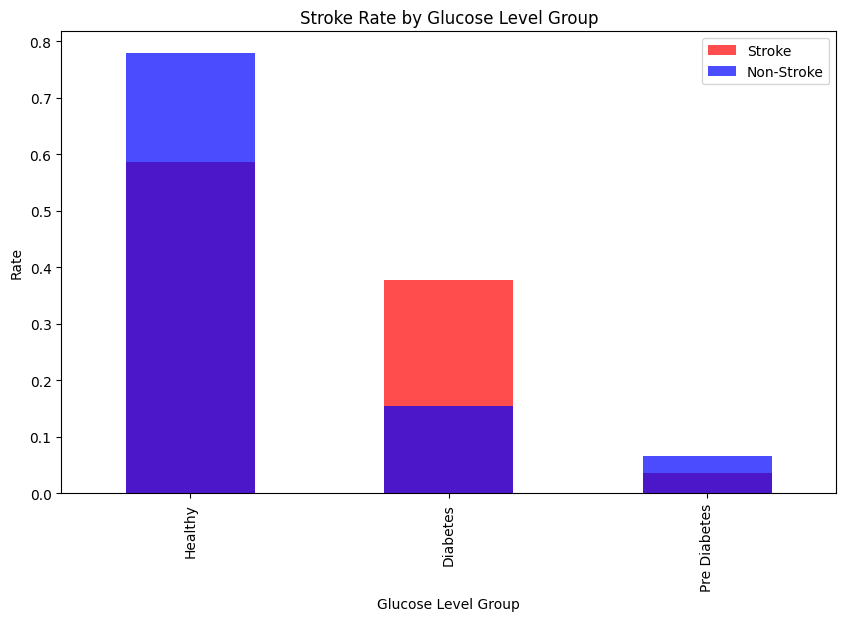

In [71]:
data_copy['glucose_level_group'] = data_copy['avg_glucose_level'].apply(glucose_level_bin)

# Calculate stroke rate by glucose level group
glucose_stroke_rate = data_copy[data_copy['stroke'] == 1]['glucose_level_group'].value_counts(normalize=True)
glucose_non_stroke_rate = data_copy[data_copy['stroke'] == 0]['glucose_level_group'].value_counts(normalize=True)

# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Stroke Rate by Glucose Level Group')
glucose_stroke_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
glucose_non_stroke_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('Glucose Level Group')
plt.ylabel('Rate')
plt.legend()
plt.show()

**Sumary:**
+ **Mean** : The mean glucose level for the stroke group (132.54) is significantly higher than that of the non-stroke group (104.80). This suggests that individuals who have experienced a stroke tend to have higher average glucose levels, which could indicate a relationship between elevated glucose levels and stroke risk.

+ **Median** : The median glucose level for stroke patients (105.22) is also higher than that of non-stroke patients (91.47), further supporting the idea that elevated glucose levels are more common among stroke patients.

+ **Quartiles** : The stroke group shows a higher upper quartile (196.71), which means that a significant portion of stroke patients have glucose levels higher than 196.

+ **Group** : In the Diabetes group, the rate of stroke is significantly higher. Implying that diabets may contribute to stroke. In the other hand, Healthy group have the rate of not having stroke higher than having stroke.


**Conclusion:**

+ In conclusion, according to this dataset, higher average glucose levels are observed in stroke patients compared to non-stroke patients, suggesting that elevated glucose levels, in another words, stroke paitent likely to have diabets

For Categorical features, we will take hypertension, heart_disease, Residence_type and smoking_status in consider

#### **HYPERTENSION**

Hypertension, often called the "silent killer," has a fascinating side: it's a prime example of how small lifestyle tweaks can wield massive power over your health.

**Get the proportion of hypertension between 2 groups stoke and no stroke**

In [72]:
stroke_hypertension_rate = stroke_df['hypertension'].value_counts(normalize=True)
nostroke_hypertension_rate = nostroke_df['hypertension'].value_counts(normalize=True)

hypertension_rate = pd.DataFrame(
    {
        'Stroke': stroke_hypertension_rate,
        'No Stroke': nostroke_hypertension_rate
    }
).T

hypertension_rate

hypertension,0,1
Stroke,0.734940,0.265060
No Stroke,0.911129,0.088871


**Visualize the result via bar plot**

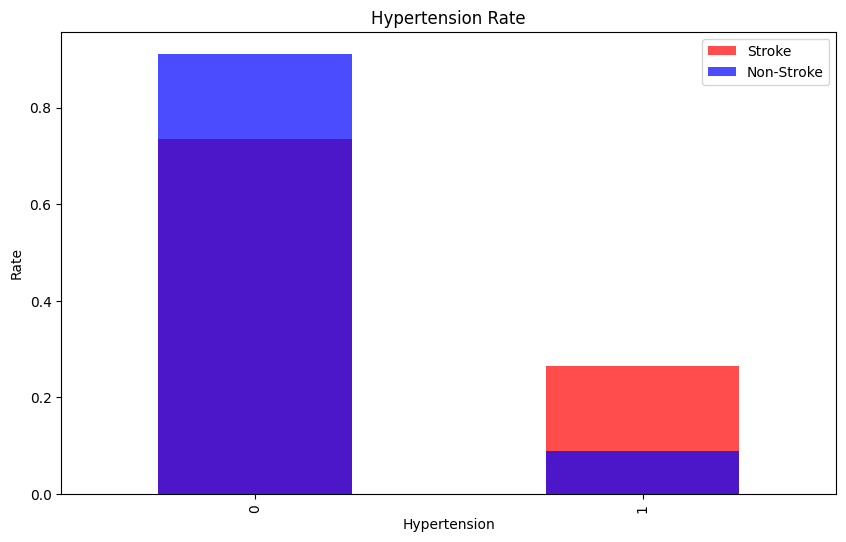

In [73]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Hypertension Rate')
stroke_hypertension_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
nostroke_hypertension_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Rate')
plt.legend()
plt.show()



**Sumary:**

+ Hypertension is less common in the non-stroke group (8.89%) compared to the stroke group (26.51%).
+ A higher percentage of people without a stroke do not have hypertension (91.11%) compared to the stroke group (73.49%).
+ The stroke group has a notably higher proportion of people with hypertension (26.51%) compared to the non-stroke group (8.89%).
+ The plot indicate that uppon having Hypertension, the rate of getting stroke is notably high

**Conclusion:**
+ In conclusion, according to this dataset, hypertension may be a more prevalent risk factor for stroke

#### **HEART DISEASE**

Many heart attacks occur on Monday mornings...

**Get the proportion between stroke paitents and no stroke individual**

In [74]:

stroke_heart_disease_rate = stroke_df['heart_disease'].value_counts(normalize=True)
nostroke_heart_disease_rate = nostroke_df['heart_disease'].value_counts(normalize=True)

heart_disease_rate = pd.DataFrame(
    {
        'Stroke': stroke_heart_disease_rate,
        'No Stroke': nostroke_heart_disease_rate
    }
).T

heart_disease_rate


heart_disease,0,1
Stroke,0.811245,0.188755
No Stroke,0.952890,0.047110


**Visualize the rate of stroke when having heart disease**

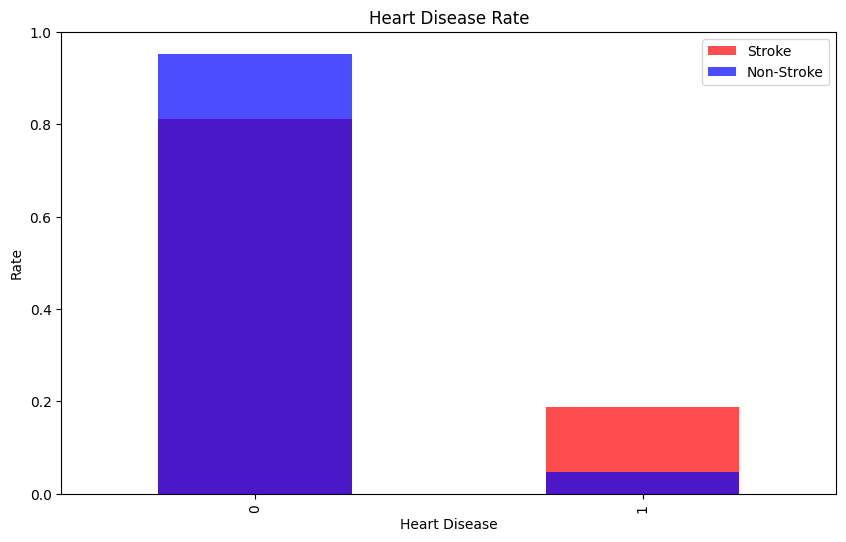

In [75]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Heart Disease Rate')
stroke_heart_disease_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
nostroke_heart_disease_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('Heart Disease')
plt.ylabel('Rate')
plt.legend()
plt.show()

**Sumary**:
+ Heart disease is more common in the stroke group (18.88%) compared to the non-stroke group (4.71%).
+ A higher percentage of people without a stroke do not have heart disease (95.29%) compared to the stroke group (81.12%).
+ The stroke group has a significantly higher proportion of individuals with heart disease (18.88%) compared to the non-stroke group (4.71%).
+ As observed on the plot, the chance of getting stroke increase when somone have heart dissease

**Conclusion:**
+ In conclusion, based on this dataset, patients with heart disseases may be more vulnerable to stroke.


#### **RESIDENCE TYPE**

As economic grow, urbanization happen with more percentage of people move from rural area to fancy cities. With a huge change in habbit, will the citizen survive the "stroke appocalypse".

**Proportion between urban and rural**

In [76]:
stroke_residence_rate = stroke_df['Residence_type'].value_counts(normalize=True)
nostroke_residence_rate = nostroke_df['Residence_type'].value_counts(normalize=True)

residence_rate = pd.DataFrame(
    {
        'Stroke': stroke_residence_rate,
        'No Stroke': nostroke_residence_rate
    }
).T

residence_rate

Residence_type,1,0
Stroke,0.542169,0.457831
No Stroke,0.506274,0.493726


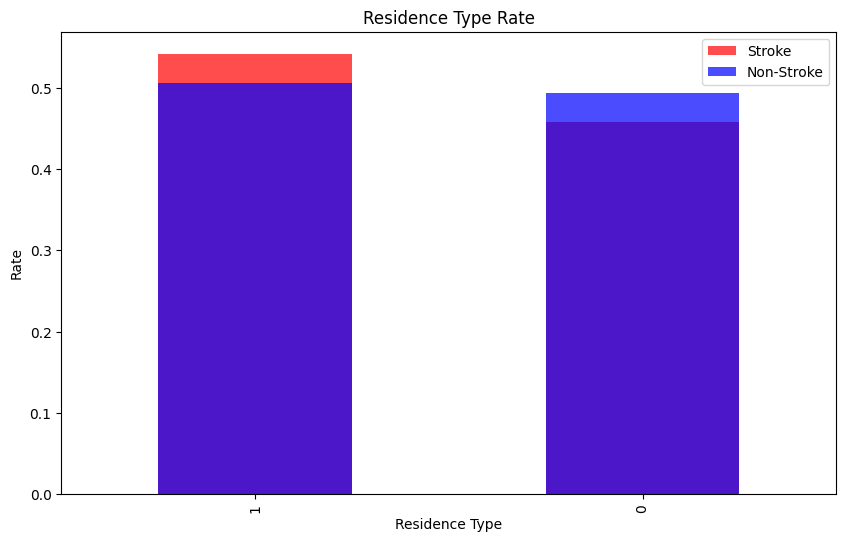

In [77]:
# Bar plot
plt.figure(figsize=(10, 6))
plt.title('Residence Type Rate')
stroke_residence_rate.plot(kind='bar', alpha=0.7, color='red', label='Stroke')
nostroke_residence_rate.plot(kind='bar', alpha=0.7, color='blue', label='Non-Stroke')
plt.xlabel('Residence Type')
plt.ylabel('Rate')
plt.legend()
plt.show()

**Sumary**
+ The distribution of residence type is fairly similar between the stroke and non-stroke groups, with a slightly higher percentage of stroke patients living in urban areas (54.22%) compared to those without a stroke (50.63%).
+ A slightly higher percentage of non-stroke patients live in rural areas (49.37%) compared to stroke patients (45.78%).

**Conclusion:**
This suggests that residence type (urban or rural) does not show a relationship with stroke. You can run (from the countryside to the city) but you can't hide (from stroke)

### Conclusion

Here are some common characteristics  found in a stroke paitent:

+ **Age** : Stroke is more prevalent among older individuals, as the risk increases with age, particularly in those over 40.

+ **Obesity** : Excess body weight, especially abdominal fat, can increase the risk of stroke by contributing to other health issues like hypertension and diabetes.

+ **Diabets** : Having diabetes, particularly if poorly managed, significantly raises the risk of stroke due to its impact on blood vessels and circulation.

+ **Hypertension** : High blood pressure is one of the leading risk factors for stroke, as it can damage blood vessels in the brain, making them more prone to rupture or blockage.

+ **Heart dissease** : Conditions like atrial fibrillation, heart failure, and coronary artery disease can increase the likelihood of stroke, as they often lead to poor blood circulation or blood clots that may travel to the brain.


**Result comparision with realife reasearch and article:**

1. Reference : https://tamanhhospital.vn/dot-quy-o-nguoi-gia/
Tuổi tác là một trong những yếu tố rủi ro không thể kiểm soát được của đột quỵ người già. Hơn 70% trường hợp đột quỵ xảy ra ở người trên 65 tuổi, vì vậy người cao tuổi cần chủ động thăm khám, tầm soát đột quỵ định kỳ, theo dõi tình trạng sức khỏe thường xuyên để kịp thời xử lý các bất thường tiềm ẩn, nếu có.

2. Reference : https://www.vinmec.com/vie/bai-viet/dot-quy-nguyen-nhan-dau-hieu-nhan-biet-cach-phong-tranh-vi
    + Đái tháo đường: Các vấn đề liên quan đến đái tháo đường có khả năng làm tăng nguy cơ đột quỵ.
    + Bệnh tim mạch: Người mắc các bệnh lý tim mạch có khả năng bị đột quỵ cao hơn người bình thường
    + Cao huyết áp: Cao huyết áp gây gia tăng sức ép lên thành động mạch, lâu dần khiến thành động mạch bị tổn thương dẫn đến xuất huyết não. Ngoài ra, cao huyết áp còn tạo điều kiện cho các cục máu đông hình thành, cản trở quá trình lưu thông máu lên não. Khám huyết áp là một trong những biện pháp để tìm ra nguyên nhân đột quỵ.
    + Mỡ máu: Cholesterol cao có thể tích tụ trên thành động mạch, tạo thành vật cản gây tắc nghẽn mạch máu não.
    + Thừa cân, béo phì: Người bị thừa cân béo phì có thể dẫn đến nhiều bệnh như cao huyết áp, mỡ máu, tim mạch. Tăng nguy cơ bị đột quỵ.

3. Reference : https://www.nhs.uk/conditions/stroke/causes/
    + A stroke can happen to anyone at any age, but your risk may increase if:
        + you're over 50 years old
        + you have an unhealthy lifestyle
        + high blood pressure (hypertension)
        + diabetes
        + irregular and fast heartbeats (atrial fibrillation)


&rarr; Our result matched the research document and post conducted by doctor in the internet



<div id = "question-3"> <h3>5.3. Question 3 </h3></div>

**A question:** What lifestyle choices can help us best reduce our risk of having a stroke?

**Answer this question will help us:**
- Identify which specific values within each feature are most strongly associated with a higher risk of having a stroke compared to the others.
- Prevent strokes by making the most effective lifestyle changes possible, given that not all individual characteristics can be modified.
- Find out the lifestyle that is associated with the lowest stroke risk.

**How to answer:** 
- Turn all numerical features into categorical columns.
    - Case 1: Divide them into bins with equal occurrence rates, so we can ensure that each bin represents the same proportion of the dataset.
    - Case 2: Divide them into groups based on their medical implications to ensure the conclusions are both practically meaningful and relevant to the medical context.
- Use Chi-square test to identify the significance of the features to decide which features will be removed.
- Compare the distribution of values in the general population with the distribution of values in the stroke sample set to identify any significant differences.
- Use the Z-test helps determine whether the difference between the overall rate and the rate in the stroke group is statistically significant, ensuring that conclusions are based on reliable data rather than chance.
- Draw conclusions about which value from each feature is most strongly associated with an increased likelihood of having a stroke.

### Preprocessing

- We observe that there is only 1 representation with gender as 'Other', which has no statistical significance, so we will remove this representation

In [78]:
# Create data_q3 by filtering out rows where Gender is 'Other'
data_q3 = data[data['gender'] != 2].copy()
data_q3['gender'].unique()

array([0, 1])

In [79]:
data_q3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,intercept
0,0,67.0,0,1,1,3,1,228.69,36.600000,2,1,1
1,1,61.0,0,0,1,4,0,202.21,33.877778,1,1,1
2,0,80.0,0,1,1,3,0,105.92,32.500000,1,1,1
3,1,49.0,0,0,1,3,1,171.23,34.400000,3,1,1
4,1,79.0,1,0,1,4,0,174.12,24.000000,1,1,1


- Perform chi-square test to check if the distribution of strokes differs by categorical columns

In [80]:
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [81]:
# Create empty lists to store results
columns = ['gender', 'age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
chi2_stats = []
p_values = []

# Calculate chi-square test for each column
for col in columns:
    contingency_table = pd.crosstab(data_q3[col], data_q3['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p_value)

# Create and display results table
results_df = pd.DataFrame({
    'Feature': columns,
    'Chi-square Statistic': [f'{x:.4f}' for x in chi2_stats],
    'p-value': [f'{x:.4f}' for x in p_values]
})

# Display table with formatting
display(results_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', ''),
               ('text-align', 'center'),
               ('border', '1px solid black'),
               ('padding', '5px')]},
    {'selector': 'td',
     'props': [('border', '1px solid black'),
               ('padding', '5px')]}
]))

,Feature,Chi-square Statistic,p-value
0,gender,0.3400,0.5598
1,age,491.6052,0.0000
2,avg_glucose_level,4170.7352,0.0160
3,bmi,458.8432,0.0820
4,hypertension,81.5731,0.0000
5,heart_disease,90.2294,0.0000
6,ever_married,58.8678,0.0000
7,work_type,49.1591,0.0000
8,Residence_type,1.0750,0.2998
9,smoking_status,29.2257,0.0000


    → Since p-values of Gender and Residence_type are to big than 0.05, Gender and Residence_type do not have a significant impact on stroke risk in this dataset, so we will proceed to remove both columns.
    → Especially that p-value of bmi is a little bigger than 0.05, we will keep this column to analyze later.
    → Also, we leave out the work_type column because that's almost hard to everybody to change

In [82]:
data_q3.drop(['gender', 'Residence_type', 'work_type'], axis=1, inplace=True)
data_q3.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke,intercept
0,67.0,0,1,1,228.69,36.600000,2,1,1
1,61.0,0,0,1,202.21,33.877778,1,1,1
2,80.0,0,1,1,105.92,32.500000,1,1,1
3,49.0,0,0,1,171.23,34.400000,3,1,1
4,79.0,1,0,1,174.12,24.000000,1,1,1


- Data for case 1:

In [83]:
# Create copy of data for case 2
data_q3_bin1 = data_q3.copy()

# Convert age to categories
def age_category(age):
    if 0 < age <= 20:
        return '0-20'
    elif 20 < age <= 40:
        return '21-40'
    elif 40 < age <= 60:
        return '41-60'
    elif 60 < age <= 80:
        return '61-80'
    else:
        return '80+'

data_q3_bin1['age'] = data_q3_bin1['age'].apply(age_category)

# Convert glucose level to categories
def glucose_category(glucose):
    if 0 < glucose <= 117:
        return 'Healthy'
    elif 117 < glucose <= 137:
        return 'Pre Diabetes'
    else:
        return 'Diabetes'

data_q3_bin1['avg_glucose_level'] = data_q3_bin1['avg_glucose_level'].apply(glucose_category)

# Convert BMI to categories
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal'
    elif 25 <= bmi <= 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data_q3_bin1['bmi'] = data_q3_bin1['bmi'].apply(bmi_category)

- Data for case 2:

In [84]:
# Create a copy of the original data for case 2
data_q3_bin2 = data_q3.copy()

# Convert age into 4 equal-sized bins and get bin ranges
age_bins = pd.qcut(data_q3_bin2['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
age_ranges = pd.qcut(data_q3_bin2['age'], q=4, retbins=True)[1]
data_q3_bin2['age'] = age_bins

# Convert glucose level into 4 equal-sized bins and get bin ranges
glucose_bins = pd.qcut(data_q3_bin2['avg_glucose_level'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
glucose_ranges = pd.qcut(data_q3_bin2['avg_glucose_level'], q=4, retbins=True)[1]
data_q3_bin2['avg_glucose_level'] = glucose_bins

# Convert BMI into 4 equal-sized bins and get bin ranges
bmi_bins = pd.qcut(data_q3_bin2['bmi'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
bmi_ranges = pd.qcut(data_q3_bin2['bmi'], q=4, retbins=True)[1]
data_q3_bin2['bmi'] = bmi_bins

- Comment: because of using qcut() function in pandas, values in columns will be distributed as evenly as possible into bins, however there may still be some imbalance since qcut() ensures consistency by keeping identical values in the same bin.

### Analysis

- Case 1:

In [85]:
# Create empty lists to store results
columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']
chi2_stats = []
p_values = []

# Calculate chi-square test for each column
for col in columns:
    contingency_table = pd.crosstab(data_q3_bin1[col], data_q3_bin1['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p_value)

# Create and display results table
results_df = pd.DataFrame({
    'Feature': columns,
    'Chi-square Statistic': [f'{x:.4f}' for x in chi2_stats],
    'p-value': [f'{x:.4f}' for x in p_values]
})

# Display table with formatting
display(results_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', ''),
               ('text-align', 'center'),
               ('border', '1px solid black'),
               ('padding', '5px')]},
    {'selector': 'td',
     'props': [('border', '1px solid black'),
               ('padding', '5px')]}
]))

,Feature,Chi-square Statistic,p-value
0,age,324.4758,0.0000
1,avg_glucose_level,85.4947,0.0000
2,bmi,39.3556,0.0000
3,hypertension,81.5731,0.0000
4,heart_disease,90.2294,0.0000
5,ever_married,58.8678,0.0000
6,smoking_status,29.2257,0.0000


    → Based on the chi-square test results: all remaining columns have a significant relationship with stroke (p < 0.05)

In [86]:
# Get unique age groups
age_groups = data_q3_bin1['age'].unique()

# For each age group
for age_group in age_groups:
    print(f"\nPercentage distributions for age group: {age_group}")
    print("-" * 80)
    
    # Get data for this age group
    age_group_data = data_q3_bin1[data_q3_bin1['age'] == age_group]
    
    # Create a DataFrame to store results
    results = []
    
    # Calculate percentages for other columns
    for col in ['avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
        # Calculate value counts and percentages
        value_counts = age_group_data[col].value_counts()
        total_percentages = (value_counts / len(age_group_data[col])) * 100
        
        # Calculate percentages for stroke=0
        stroke_0_data = age_group_data[age_group_data['stroke'] == 0]
        stroke_0_counts = stroke_0_data[col].value_counts()
        stroke_0_percentages = (stroke_0_counts / len(stroke_0_data)) * 100
        
        print(f"\nFeature: {col}")
        print("=" * 80)
        print(f"{'Value':<10} {'Total %':>10} {'Non-stroke %':>15} {'Difference %':>15} {'Z-stat':>10} {'P-value':>10}")
        print("-" * 80)
        
        for value in value_counts.index:
            total_pct = total_percentages[value] if value in total_percentages else 0
            stroke_0_pct = stroke_0_percentages[value] if value in stroke_0_percentages else 0
            diff_value = stroke_0_pct - total_pct
            
            # Get counts for z-test
            count1 = stroke_0_counts[value] if value in stroke_0_counts else 0
            count2 = value_counts[value] if value in value_counts else 0
            n1 = len(stroke_0_data)
            n2 = len(age_group_data)
            
            # Perform proportions z-test
            z_stat, p_value = proportions_ztest([count1, count2], [n1, n2])
            
            print(f"{value:<10} {total_pct:>10.2f} {stroke_0_pct:>15.2f} {diff_value:>15.2f} {z_stat:>10.2f} {p_value:>10.4f}")


Percentage distributions for age group: 61-80
--------------------------------------------------------------------------------

Feature: avg_glucose_level
Value         Total %    Non-stroke %    Difference %     Z-stat    P-value
--------------------------------------------------------------------------------
Healthy         66.58           68.47            1.89       0.95     0.3430
Diabetes        29.21           27.47           -1.74      -0.91     0.3635
Pre Diabetes       4.21            4.06           -0.15      -0.17     0.8624

Feature: bmi
Value         Total %    Non-stroke %    Difference %     Z-stat    P-value
--------------------------------------------------------------------------------
Obese           49.41           48.45           -0.96      -0.45     0.6522
Overweight      34.09           35.20            1.11       0.55     0.5825
Normal          15.32           14.99           -0.33      -0.22     0.8290
Underweight       1.18            1.35            0.18    

    → After finding the difference between the proportions of values for stroke = 0 and for the total population in all subdatasets, we can see that the percentage differences are very small.

    → Additionally, by using z-test, we found that these differences in proportions have no practical significance since p > 0.05.

- Case 2:

In [87]:
# Create empty lists to store results
columns = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']
chi2_stats = []
p_values = []

# Calculate chi-square test for each column
for col in columns:
    contingency_table = pd.crosstab(data_q3_bin2[col], data_q3_bin2['stroke'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2)
    p_values.append(p_value)

# Create and display results table
results_df = pd.DataFrame({
    'Feature': columns,
    'Chi-square Statistic': [f'{x:.4f}' for x in chi2_stats],
    'p-value': [f'{x:.4f}' for x in p_values]
})

# Display table with formatting
display(results_df.style.set_properties(**{
    'text-align': 'center',
    'border': '1px solid black',
    'padding': '5px'
}).set_table_styles([
    {'selector': 'th',
     'props': [('background-color', ''),
               ('text-align', 'center'),
               ('border', '1px solid black'),
               ('padding', '5px')]},
    {'selector': 'td',
     'props': [('border', '1px solid black'),
               ('padding', '5px')]}
]))

,Feature,Chi-square Statistic,p-value
0,age,325.9833,0.0000
1,avg_glucose_level,49.7387,0.0000
2,bmi,46.2946,0.0000
3,hypertension,81.5731,0.0000
4,heart_disease,90.2294,0.0000
5,ever_married,58.8678,0.0000
6,smoking_status,29.2257,0.0000


    → Based on the chi-square test results: all remaining columns have a significant relationship with stroke (p < 0.05)

In [88]:
# Get unique age groups
age_groups = data_q3_bin2['age'].unique()

# For each age group
for age_group in age_groups:
    print(f"\nPercentage distributions for age group: {age_group}")
    print("-" * 80)
    
    # Get data for this age group
    age_group_data = data_q3_bin2[data_q3_bin2['age'] == age_group]
    
    # Create a DataFrame to store results
    results = []
    
    # Calculate percentages for other columns
    for col in ['avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'ever_married', 'smoking_status']:
        # Calculate value counts and percentages
        value_counts = age_group_data[col].value_counts()
        total_percentages = (value_counts / len(age_group_data[col])) * 100
        
        # Calculate percentages for stroke=0
        stroke_0_data = age_group_data[age_group_data['stroke'] == 0]
        stroke_0_counts = stroke_0_data[col].value_counts()
        stroke_0_percentages = (stroke_0_counts / len(stroke_0_data)) * 100
        
        print(f"\nFeature: {col}")
        print("=" * 80)
        print(f"{'Value':<10} {'Total %':>10} {'Non-stroke %':>15} {'Difference %':>15} {'Z-stat':>10} {'P-value':>10}")
        print("-" * 80)
        
        for value in value_counts.index:
            total_pct = total_percentages[value] if value in total_percentages else 0
            stroke_0_pct = stroke_0_percentages[value] if value in stroke_0_percentages else 0
            diff_value = stroke_0_pct - total_pct
            
            # Get counts for z-test
            count1 = stroke_0_counts[value] if value in stroke_0_counts else 0
            count2 = value_counts[value] if value in value_counts else 0
            n1 = len(stroke_0_data)
            n2 = len(age_group_data)
            
            # Perform proportions z-test
            z_stat, p_value = proportions_ztest([count1, count2], [n1, n2])
            
            print(f"{value:<10} {total_pct:>10.2f} {stroke_0_pct:>15.2f} {diff_value:>15.2f} {z_stat:>10.2f} {p_value:>10.4f}")


Percentage distributions for age group: Q4
--------------------------------------------------------------------------------

Feature: avg_glucose_level
Value         Total %    Non-stroke %    Difference %     Z-stat    P-value
--------------------------------------------------------------------------------
Q4              35.02           33.02           -2.00      -1.00     0.3150
Q1              21.91           21.85           -0.05      -0.03     0.9764
Q3              21.74           22.61            0.87       0.50     0.6181
Q2              21.34           22.52            1.18       0.68     0.4960

Feature: bmi
Value         Total %    Non-stroke %    Difference %     Z-stat    P-value
--------------------------------------------------------------------------------
Q3              38.60           38.03           -0.57      -0.28     0.7810
Q2              28.99           28.76           -0.23      -0.12     0.9039
Q4              20.36           21.19            0.83       0.4

    → After finding the difference between the proportions of values for stroke = 0 and for the total population in all subdatasets, we can see that the percentage differences are very small.

    → Additionally, by using z-test, we found that these differences in proportions have no practical significance since p > 0.05.

### Conclusion

- With both ways of dividing bins, the results show us that the difference in output (stroke) between the values ​​of the "lifestyle" columns is very small.
- In addition, by using the Z-test to test whether that small difference is meaningful or not, the conclusion will still be that "lifestyle" does not really affect the stroke rate in this dataset.

    → There is no lifestyle that has the lowest stroke rate.

<div id = "question-4"> <h3>5.4. Question 4 </h3></div>

**A question:** Can we predict stroke of a person

**Answer this question will help us:** predict whether a person will have a stroke based on given features like age, BMI, smoking status, etc

**How to answer:**

- Review again the dataset to see if there is any problems
- If there is any problems, we will have to modify data on **`Preprocessing`** section
- After modification, we will have to choose features using **SelectKBest** to prepare data for modelling
- After modelling, evaluate the models based on metrics to choose the best model for stroke prediction

#### Overview of EDA and Domain Information

- Overview of EDA:
    - Order / Values of features for positive cases of stroke :
        - **Categorical Features (Order by positive correlation with stroke) :**

            - **gender :** female > male
            - **hypertension :** no hypertension > hypertension
            - **heart_disease :** no heart disease > heart disease
            - **ever_married :** married > not married
            - **work_type :** Private > Self-employed > Govt_job > children
            - **Residence_type :** Urban > Rural
            - **smoking_status :** never smoked > formerly smoked > smokes
        - **Discrete Features (Range) :**

            - **age :** 35 - 80
            - **avg_glucose_level :** 80 - 230
            - **bmi :** 20 - 40
        
    According to the data, these order / range of values leads to heart failures.

- Overview of Domain Information:
    - Order / Values of features for positive cases of stroke :

        - **Categorical Features (Order) :**

            - **gender :** [male > female](https://bmccardiovascdisord.biomedcentral.com/articles/10.1186/s12872-022-02780-w)
            - **hypertension :** [hypertension > no hypertension](https://pmc.ncbi.nlm.nih.gov/articles/PMC6659031/)
            - **heart_disease :** [heart disease > no heart disease](https://www.heart.org/en/about-us/heart-and-stroke-association-statistics)
            - **ever_married :** [married <= not married](https://pmc.ncbi.nlm.nih.gov/articles/PMC5878185/)
            - **work_type :** [High strain work can lead to stroke](https://pubmed.ncbi.nlm.nih.gov/26468409/)
            - **Residence_type :** [Mortality due to stroke is higher in rural areas than - urban areas due to poor medical treatment](https://www.ahajournals.org/doi/full/10.1161/CIRCOUTCOMES.118.004973)
            - **smoking_status :** [Smoking increases the risk of stroke](https://pmc.ncbi.nlm.nih.gov/articles/PMC2928253/)
        
        - **Discrete Features (Range) :**

            - **age :** [The chance of having a stroke about doubles with each decade after age 45 and over 70% of all strokes occur above the age of 65](https://pmc.ncbi.nlm.nih.gov/articles/PMC3006180/)
            - **avg_glucose_level :** [High blood glucose is found in stroke cases](https://www.ahajournals.org/doi/full/10.1161/strokeaha.111.631218)
            - **bmi :** [High bmi values increases the chances of ischemic stroke](https://pubmed.ncbi.nlm.nih.gov/35971008/)
- There are lots of contradiction between EDA and Domain Information, because of **Unbalanced Dataset** in the column of **`Stroke`**
- Therefore, we will use **SMOTE** to balance datasets

### Preprocessing

#### Feature Engineering
- In order to deal with unbalanced, we will use **SMOTE**, but in order to have the best performance, we will use both **Undersampling** and **Oversampling**:
    - **Undersampling :** Trim down the majority samples of the target variable.
    - **Oversampling :** Increase the minority samples of the target variable to the majority samples.

##### SMOTE

In [89]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter

over = SMOTE(sampling_strategy = 1)
under = RandomUnderSampler(sampling_strategy = 0.1)

f1 = data.loc[: , data.columns != 'stroke']
t1 = data.loc[:, 'stroke']

steps = [('under', under),('over', over)] 
# steps = [('over', over)] 

pipeline = Pipeline(steps=steps)

f1, t1 = pipeline.fit_resample(f1, t1)

Counter(t1) 



Counter({0: 2490, 1: 2490})

- Now data is already balanced, let's have a closer look at how SMOTE works:
    - **Initial Class Distribution:**
        - Majority class (No Stroke, 0): 4861 samples
        - Minority class (Stroke, 1): 249 samples
    - **Over-sampling (SMOTE):**
        - sampling_strategy=1:
            - Both classes were balanced by over-sampling the minority class and under-sampling the majority class
            - The pipeline eventually balanced both classes at 4861 samples each
    - **Final Class Samples :**

        - Majority Class : No Stroke : 4861 samples
        - Minority Class : Stroke : 4861 samples

##### Create train and test dataset

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f1, t1, test_size=0.2, random_state=42)

##### Feature selection for categorical columns

- In order to choose which one, we will use **Chi Squared Test** to examine whether two categorical variables are independent in influencing the test statistic

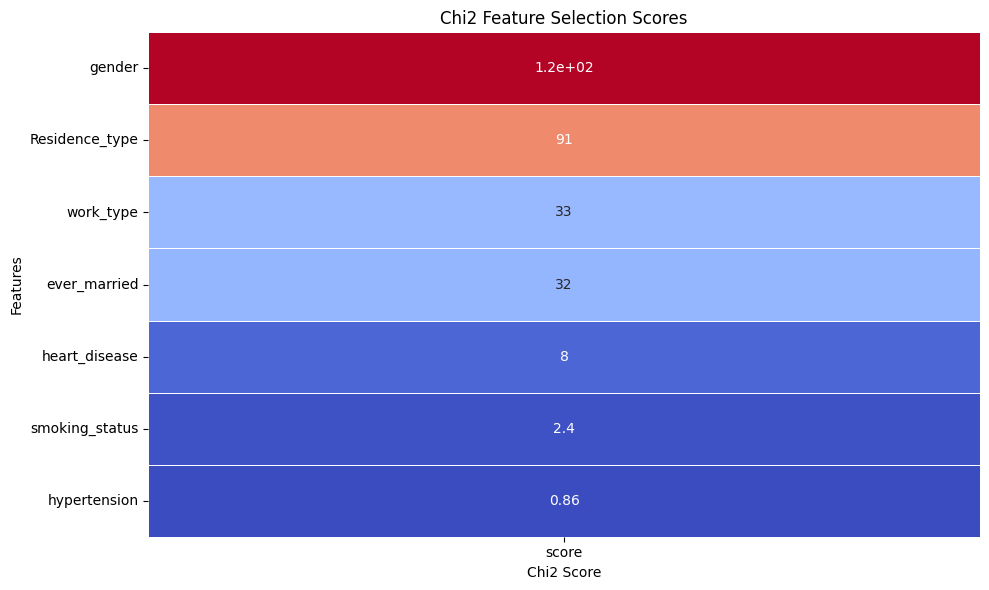

In [91]:
from sklearn.feature_selection import SelectKBest, chi2

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_categorical = X_train[categorical_columns]  # Use column names directly

# Fit SelectKBest with chi2
selector = SelectKBest(chi2, k=5)
selector.fit(X_categorical, y_train)

# Get Chi2 scores
scores = pd.DataFrame(data=selector.scores_, index=categorical_columns, columns=['score'])
scores = scores.sort_values(by='score', ascending=False)

# Plotting the scores using a barplot
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Chi2 Feature Selection Scores')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


- As can be seen, **`hypertension`**, **`heart_disease`** and **`smoking_status`** have really low values, so we will not use them for modelling

##### Feature selection for numerical columns

- In order to choose which one, we will use **ANOVA Test** to test the difference between two or more means

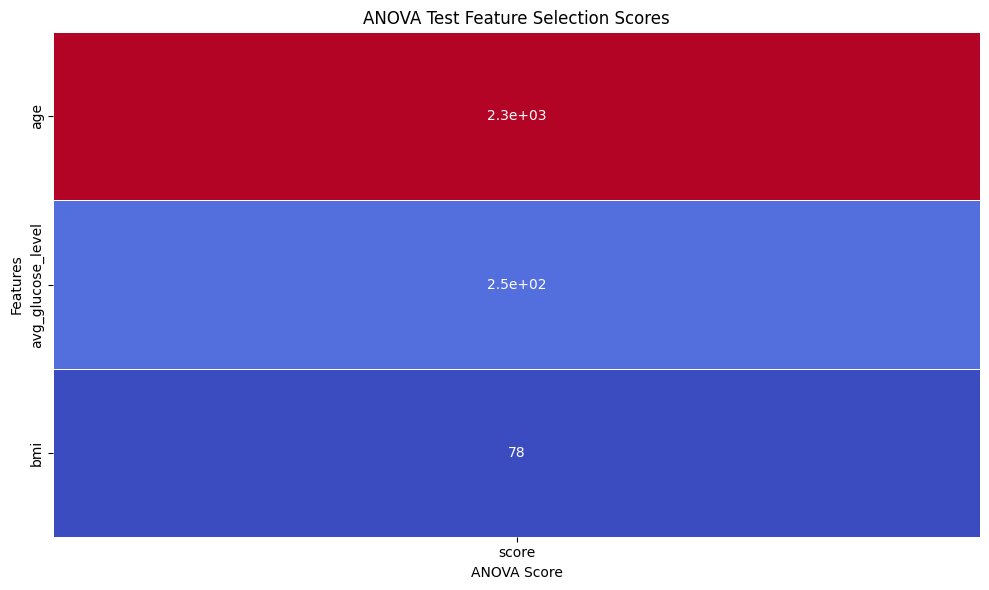

In [92]:
from sklearn.feature_selection import f_classif

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X_numerical = X_train[numerical_columns]  # Use column names directly

# Fit SelectKBest with chi2
selector = SelectKBest(f_classif, k=3)
selector.fit(X_numerical, y_train)

# Get Chi2 scores
scores = pd.DataFrame(data=selector.scores_, index=numerical_columns, columns=['score'])
scores = scores.sort_values(by='score', ascending=False)

# Plotting the scores using a barplot
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('ANOVA Test Feature Selection Scores')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


##### Feature selection for categorical columns

- In order to choose which one, we will use **Chi Squared Test** to examine whether two categorical variables are independent in influencing the test statistic

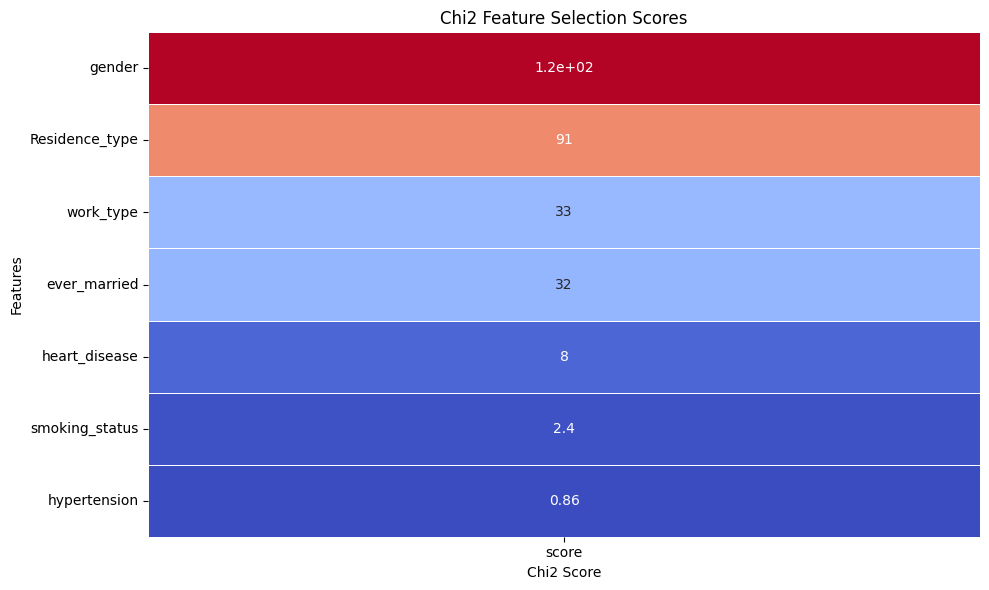

In [93]:
from sklearn.feature_selection import SelectKBest, chi2

categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_categorical = X_train[categorical_columns]  # Use column names directly

# Fit SelectKBest with chi2
selector = SelectKBest(chi2, k=5)
selector.fit(X_categorical, y_train)

# Get Chi2 scores
scores = pd.DataFrame(data=selector.scores_, index=categorical_columns, columns=['score'])
scores = scores.sort_values(by='score', ascending=False)

# Plotting the scores using a barplot
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('Chi2 Feature Selection Scores')
plt.xlabel('Chi2 Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


- As can be seen, **`hypertension`**, **`heart_disease`** and **`smoking_status`** have really low values, so we will not use them for modelling

##### Feature selection for numerical columns

- In order to choose which one, we will use **ANOVA Test** to test the difference between two or more means

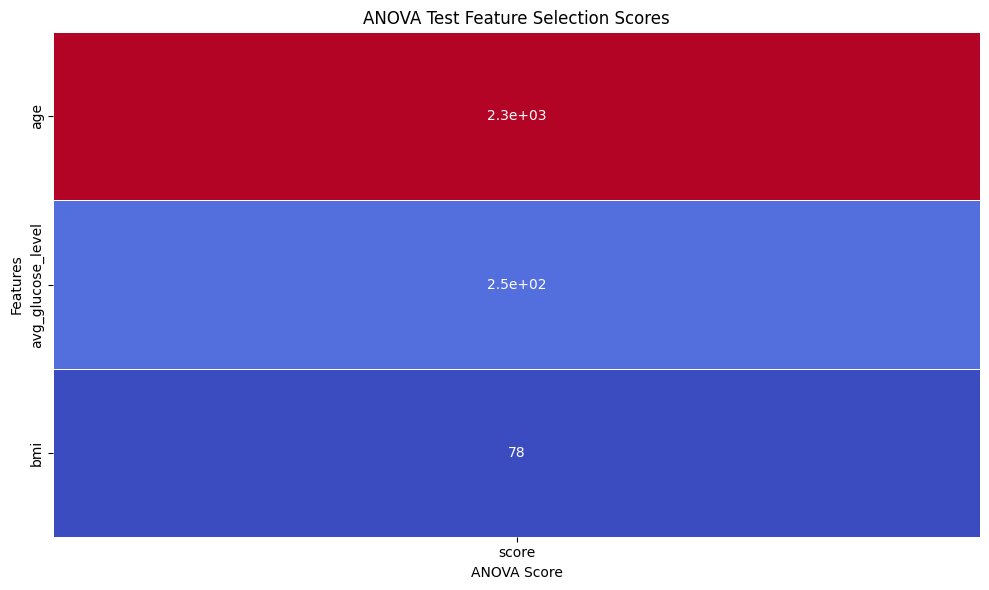

In [94]:
from sklearn.feature_selection import f_classif

numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X_numerical = X_train[numerical_columns]  # Use column names directly

# Fit SelectKBest with chi2
selector = SelectKBest(f_classif, k=3)
selector.fit(X_numerical, y_train)

# Get Chi2 scores
scores = pd.DataFrame(data=selector.scores_, index=numerical_columns, columns=['score'])
scores = scores.sort_values(by='score', ascending=False)

# Plotting the scores using a barplot
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, cmap='coolwarm', cbar=False, linewidths=0.5)
plt.title('ANOVA Test Feature Selection Scores')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


- As can be seen, **`age`**, **`avg_glucose_level`** and **`bmi`** have really high values, so we will use them for modelling

In [95]:
X_train = X_train.drop(['smoking_status', 'heart_disease', 'hypertension', 'bmi'], axis=1)
X_test = X_test.drop(['smoking_status', 'heart_disease', 'hypertension', 'bmi'], axis=1)


##### Data Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Normalization
age_mms = MinMaxScaler()
avg_glucose_level_mms = MinMaxScaler()

X_train['age'] = age_mms.fit_transform(X_train[['age']])
X_test['age'] = age_mms.transform(X_test[['age']])
X_train['avg_glucose_level'] = avg_glucose_level_mms.fit_transform(X_train[['avg_glucose_level']])
X_test['avg_glucose_level'] = avg_glucose_level_mms.transform(X_test[['avg_glucose_level']])

# Standardization
ever_married_ss = StandardScaler()
gender_ss = StandardScaler()
work_type_ss = StandardScaler()
residence_type_ss = StandardScaler()

X_train['ever_married'] = ever_married_ss.fit_transform(X_train[['ever_married']])
X_test['ever_married'] = ever_married_ss.transform(X_test[['ever_married']])
X_train['gender'] = gender_ss.fit_transform(X_train[['gender']])
X_test['gender'] = gender_ss.transform(X_test[['gender']])
X_train['work_type'] = work_type_ss.fit_transform(X_train[['work_type']])
X_test['work_type'] = work_type_ss.transform(X_test[['work_type']])
X_train['Residence_type'] = residence_type_ss.fit_transform(X_train[['Residence_type']])
X_test['Residence_type'] = residence_type_ss.transform(X_test[['Residence_type']])


Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data

- Normalization (MinMaxScaler):

    - Scales features to a fixed range, typically [0, 1]. Useful for features with no clear Gaussian distribution or when bounded ranges are preferred.

- Standardization (StandardScaler):

    - Scales features to have zero mean and unit variance. Suitable for features with Gaussian-like distributions, ensuring they contribute equally to the model.

##### Modelling

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [98]:
def model (classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_score = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("ROC AUC Score: ", roc_auc_score(y_test, y_pred))
    print("Cross Validation Score: ", cross_score)
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    RocCurveDisplay.from_estimator(classifier, X_test, y_test)
    plt.show()
    return classifier, cross_score, accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)

def evaluation (classifier, X_test, y_test):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, classifier.predict(X_test)))

- XGBBoostClassifier

In [99]:
from xgboost import XGBClassifier

ROC AUC Score:  0.9127381600435492
Cross Validation Score:  0.9643432417021405
Accuracy Score:  0.9126506024096386


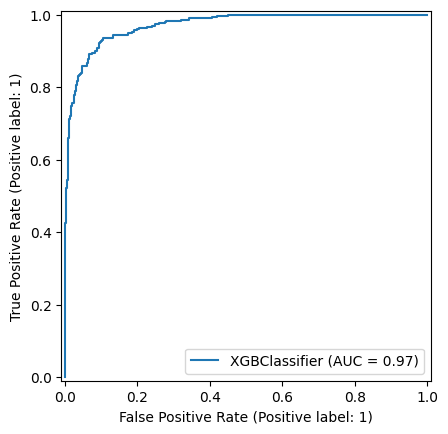

Confusion Matrix: 
 [[450  51]
 [ 36 459]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       501
           1       0.90      0.93      0.91       495

    accuracy                           0.91       996
   macro avg       0.91      0.91      0.91       996
weighted avg       0.91      0.91      0.91       996



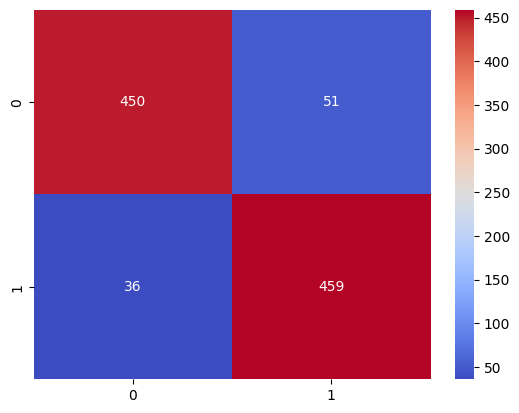

In [100]:
classifier_xgb = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5)
model_xgb, cross_val_xgb, accuracy_xgb, roc_xgb = model(classifier_xgb, X_train, y_train, X_test, y_test)
evaluation(model_xgb, X_test, y_test)

- Decision Tree Classification

ROC AUC Score:  0.8755095868868323
Cross Validation Score:  0.8687143546012892
Accuracy Score:  0.8755020080321285


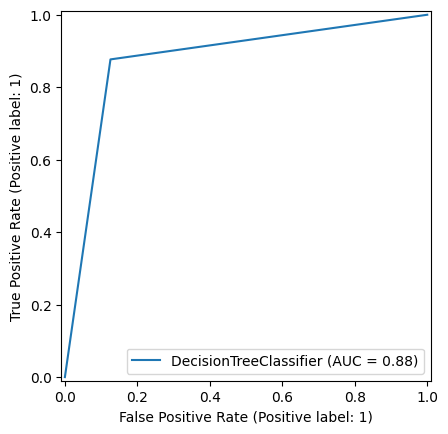

Confusion Matrix: 
 [[438  63]
 [ 61 434]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       501
           1       0.87      0.88      0.88       495

    accuracy                           0.88       996
   macro avg       0.88      0.88      0.88       996
weighted avg       0.88      0.88      0.88       996



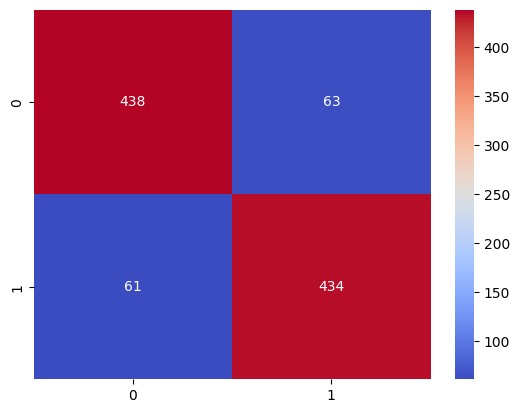

In [101]:
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
}
classifier_dt = DecisionTreeClassifier()

model_dt, cross_val_dt, accuracy_dt, roc_dt = model(classifier_dt, X_train, y_train, X_test, y_test)
evaluation(model_dt, X_test, y_test)

ROC AUC Score:  0.8596382991592573
Cross Validation Score:  0.8884844993902561
Accuracy Score:  0.8594377510040161


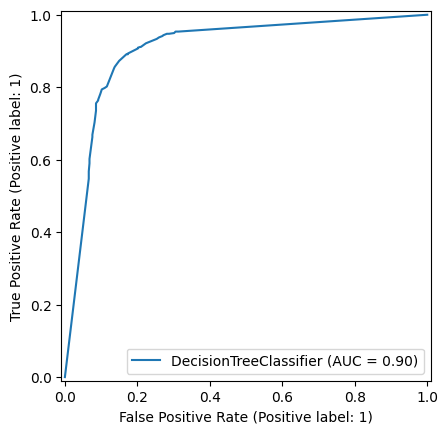

Confusion Matrix: 
 [[414  87]
 [ 53 442]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       501
           1       0.84      0.89      0.86       495

    accuracy                           0.86       996
   macro avg       0.86      0.86      0.86       996
weighted avg       0.86      0.86      0.86       996



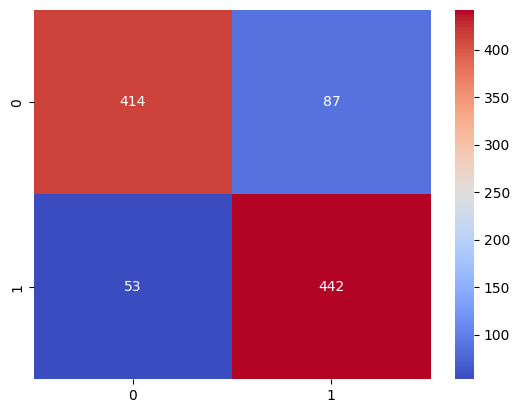

In [102]:
tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, y_train)
tree_cv_model, cross_val_dt_cv, accuracy_dt_cv, roc_dt_cv = model(DecisionTreeClassifier(**tree_cv.best_params_), X_train, y_train, X_test, y_test)
evaluation(tree_cv_model, X_test, y_test)

- KNeighborsClassifier

ROC AUC Score:  0.8638480614528519
Cross Validation Score:  0.9118563939819906
Accuracy Score:  0.8634538152610441


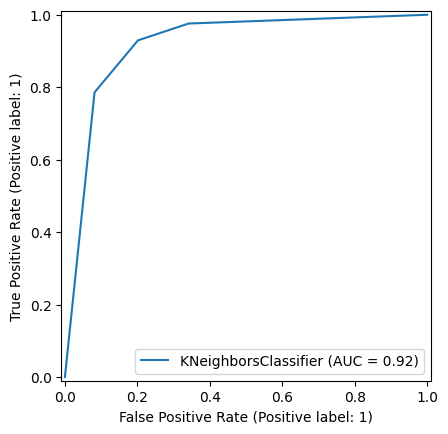

Confusion Matrix: 
 [[400 101]
 [ 35 460]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       501
           1       0.82      0.93      0.87       495

    accuracy                           0.86       996
   macro avg       0.87      0.86      0.86       996
weighted avg       0.87      0.86      0.86       996



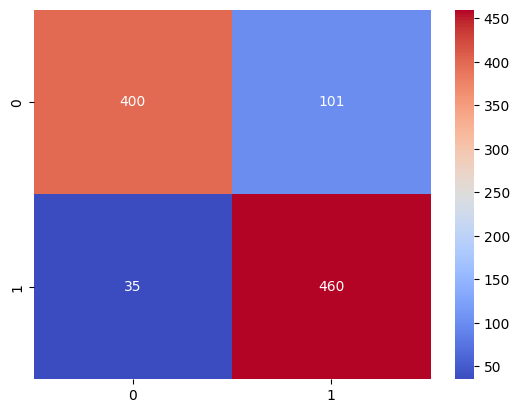

In [103]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, y_train)
knn_cv_model, cross_val_knn, accuracy_knn, roc_knn = model(KNeighborsClassifier(**knn_cv.best_params_), X_train, y_train, X_test, y_test)
evaluation(knn_cv_model, X_test, y_test)


### Analysis

<Axes: xlabel='Model', ylabel='ROC AUC Score'>

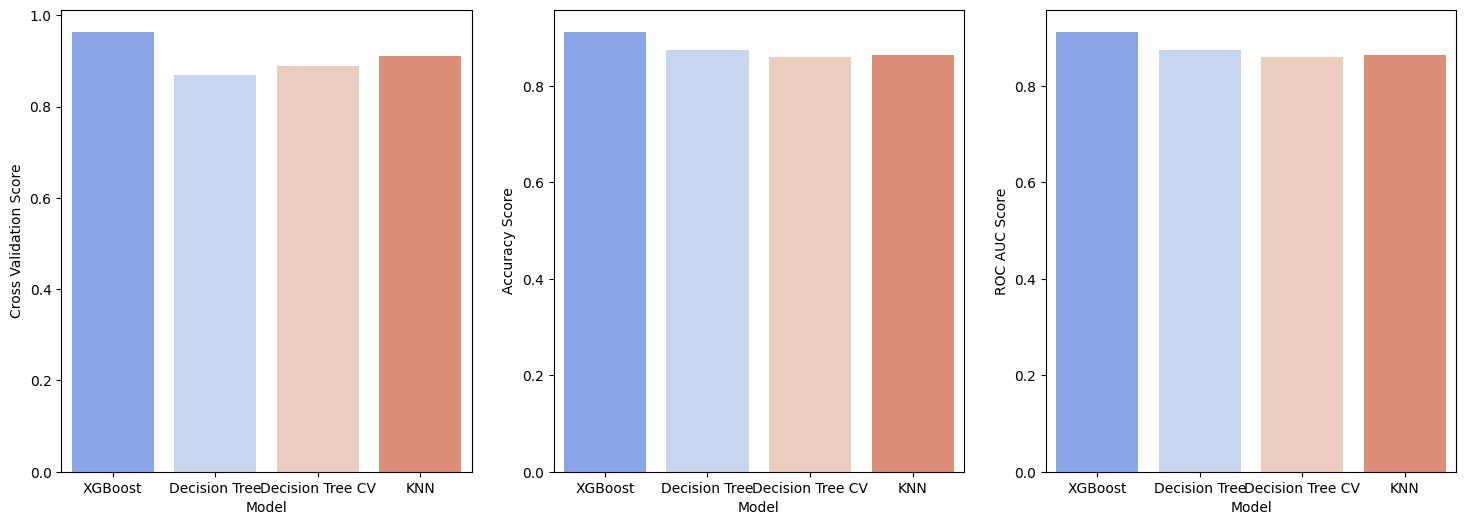

In [104]:
# Put the results in a table
results = pd.DataFrame({
    'Model': ['XGBoost', 'Decision Tree', 'Decision Tree CV', 'KNN'],
    'Cross Validation Score': [cross_val_xgb, cross_val_dt, cross_val_dt_cv, cross_val_knn],
    'Accuracy Score': [accuracy_xgb, accuracy_dt, accuracy_dt_cv, accuracy_knn],
    'ROC AUC Score': [roc_xgb, roc_dt, roc_dt_cv, roc_knn]
})

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Model', y='Cross Validation Score', data=results, ax=ax[0], palette='coolwarm' , hue='Model')
sns.barplot(x='Model', y='Accuracy Score', data=results, ax=ax[1], palette='coolwarm', hue='Model')
sns.barplot(x='Model', y='ROC AUC Score', data=results, ax=ax[2], palette='coolwarm', hue='Model')

- KNeighborsClassifier

ROC AUC Score:  0.8638480614528519
Cross Validation Score:  0.9118563939819906
Accuracy Score:  0.8634538152610441


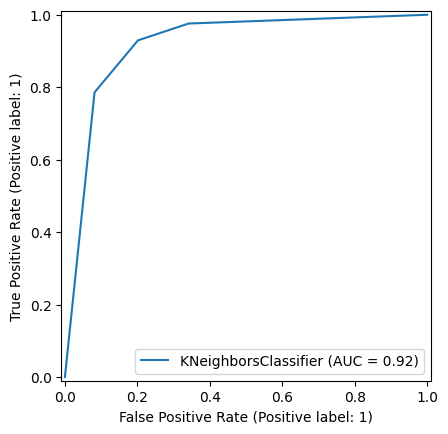

Confusion Matrix: 
 [[400 101]
 [ 35 460]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.80      0.85       501
           1       0.82      0.93      0.87       495

    accuracy                           0.86       996
   macro avg       0.87      0.86      0.86       996
weighted avg       0.87      0.86      0.86       996



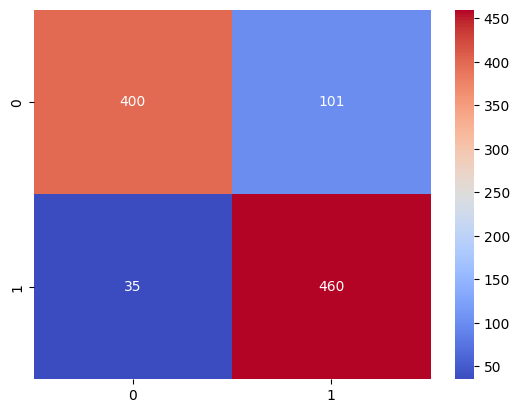

In [105]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    'n_neighbors' : list(np.arange(3, 20, 2)),
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_train, y_train)
knn_cv_model, cross_val_knn, accuracy_knn, roc_knn = model(KNeighborsClassifier(**knn_cv.best_params_), X_train, y_train, X_test, y_test)
evaluation(knn_cv_model, X_test, y_test)


### Analysis

<Axes: xlabel='Model', ylabel='ROC AUC Score'>

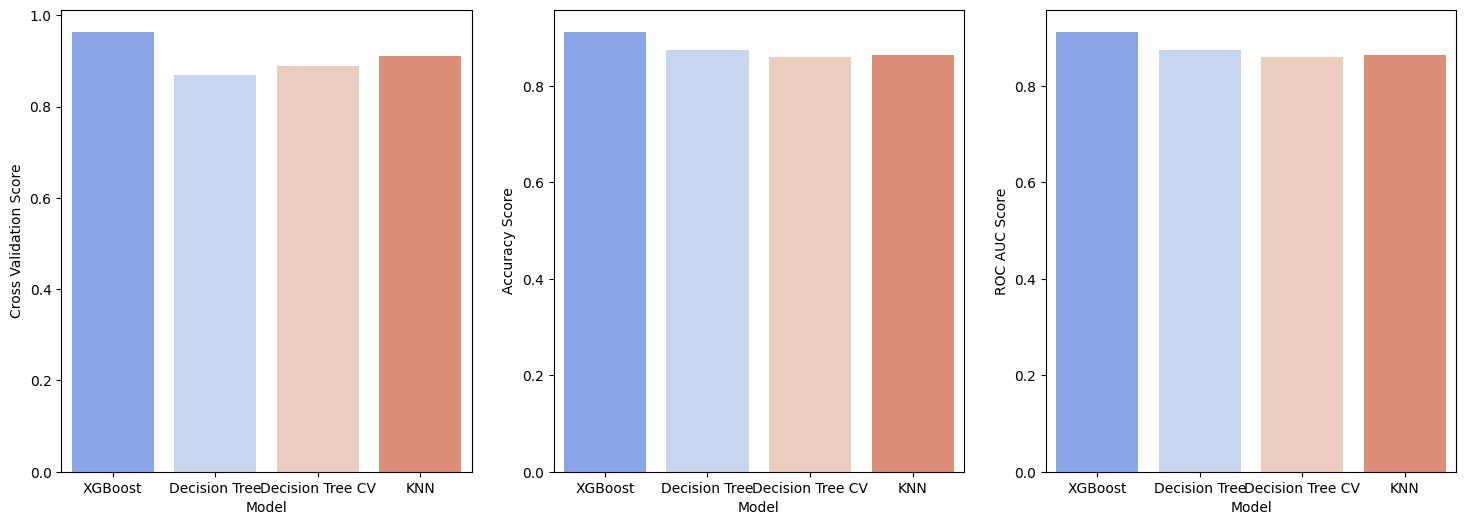

In [106]:
# Put the results in a table
results = pd.DataFrame({
    'Model': ['XGBoost', 'Decision Tree', 'Decision Tree CV', 'KNN'],
    'Cross Validation Score': [cross_val_xgb, cross_val_dt, cross_val_dt_cv, cross_val_knn],
    'Accuracy Score': [accuracy_xgb, accuracy_dt, accuracy_dt_cv, accuracy_knn],
    'ROC AUC Score': [roc_xgb, roc_dt, roc_dt_cv, roc_knn]
})

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
sns.barplot(x='Model', y='Cross Validation Score', data=results, ax=ax[0], palette='coolwarm' , hue='Model')
sns.barplot(x='Model', y='Accuracy Score', data=results, ax=ax[1], palette='coolwarm', hue='Model')
sns.barplot(x='Model', y='ROC AUC Score', data=results, ax=ax[2], palette='coolwarm', hue='Model')

- Let see the top features that affect stroke the most

In [107]:
feature_importances = model_xgb.feature_importances_

# Get the feature names from the training data
feature_names = X_train.columns

# Create a DataFrame to combine the feature names and their corresponding importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the importance values in descending order to see which features are most important
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

             Feature  Importance
1                age    0.252745
2       ever_married    0.235471
0             gender    0.166618
3          work_type    0.142099
4     Residence_type    0.122484
5  avg_glucose_level    0.080584
6          intercept    0.000000


### Prediction
- After deciding the best model, we will have something more practical to do: 
    - We will create a UI to input stats of user to predict whether that person could get stroke or not

- Standardize input before modeling

In [108]:
def standardize(features):
    features = pd.DataFrame([features], columns=['gender', 'age', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level'])
    features['gender'] = gender_ss.transform(features[['gender']])
    features['age'] = age_mms.transform(features[['age']])
    features['ever_married'] = ever_married_ss.transform(features[['ever_married']])
    features['work_type'] = work_type_ss.transform(features[['work_type']])
    features['Residence_type'] = residence_type_ss.transform(features[['Residence_type']])
    features['avg_glucose_level'] = avg_glucose_level_mms.transform(features[['avg_glucose_level']])

    features = features.values
    return features
    

- Preparing UI for input

In [109]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Create the widgets with enhanced descriptions and layout
gender = widgets.Dropdown(
    options=gender_dict.keys(),
    description='Gender:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

age = widgets.IntText(
    value=50,
    description='Age:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

ever_married = widgets.Dropdown(
    options=married_dict.keys(),
    description='Ever Married:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

work_type = widgets.Dropdown(
    options=work_type_dict.keys(),
    description='Work Type:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

Residence_type = widgets.Dropdown(
    options=residence_type_dict.keys(),
    description='Residence:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

avg_glucose_level = widgets.FloatText(
    value=150,
    description='Glucose Level:',
    layout=widgets.Layout(width='300px'),
    style={'description_width': '120px'}
)

# Create a button
button = widgets.Button(
    description="Predict",
    button_style='success',  # 'success', 'info', 'warning', 'danger'
    tooltip="Click to predict",
    icon="check"  # FontAwesome icon
)

# Define a function to handle button clicks
def on_button_click(b):
    # Encode categorical values using the dictionaries
    prediction_input = {
        'gender': gender_dict[gender.value],
        'age': age.value,
        'ever_married': married_dict[ever_married.value],
        'work_type': work_type_dict[work_type.value],
        'Residence_type': residence_type_dict[Residence_type.value],
        'avg_glucose_level': avg_glucose_level.value
    }
    print("Encoded Prediction Input:")
    prediction_input = np.array(list(prediction_input.values()))
    print(prediction_input)
    features = standardize(prediction_input)
    prediction_xgb = model_xgb.predict(features)
    print("XGBoost Prediction:", prediction_xgb)
    return prediction_xgb

# Attach the button click event to the function
button.on_click(on_button_click)

# Group the widgets in a VBox layout
form = widgets.VBox(
    [
        widgets.HTML(value="<h3>Patient Prediction Form</h3>"),
        gender,
        age,
        ever_married,
        work_type,
        Residence_type,
        avg_glucose_level,
        button,
    ],
    layout=widgets.Layout(align_items='flex-start')
)

# Display the UI
display(form)


### Conclusion

- As can be seen from the graph, **XGBoost** turns out to be the most suitable model, because it shows strong performance across all metrics, including AUC, cross-validation, and accuracy, indicating that it generalizes well and captures the relationships in the data effectively.

<div id = "conclusion"> <h2> 6. Conclusion </h2> </div>

<div id = "difficulties"> <h3>6.1. Difficulties during the project </h3></div>

<div id = "useful"> <h3>6.2. Useful things learned</h3></div>

<div id = "plans"> <h3>6.3. Plans to improve if have more time</h3></div>

<div id = "references"> <h2>7. References</h2></div>